## Lets import the required libraries and import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
data=pd.read_csv('liquor.csv')
data.head()

date convenience_store  store                       name  \
0  2015-02-19               NaN   2190  Central City Liquor, Inc.   
1  2015-02-09               NaN   2190  Central City Liquor, Inc.   
2  2014-10-30               NaN   2190   Central City Liquor Inc.   
3  2014-02-27               NaN   2190   Central City Liquor Inc.   
4  2014-02-25               NaN   2190   Central City Liquor Inc.   

        address        city zipcode  \
0  1460 2ND AVE  DES MOINES   50314   
1  1460 2ND AVE  DES MOINES   50314   
2  1460 2ND AVE  DES MOINES   50314   
3  1460 2ND AVE  DES MOINES   50314   
4  1460 2ND AVE  DES MOINES   50314   

                                      store_location  county_number county  \
0  1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...             77   Polk   
1  1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...             77   Polk   
2  1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...             77   Polk   
3  1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...             77   Polk   
4  1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...             77   Polk   

   ...  vendor_no             vendor   item  \
0  ...        421  Sazerac Co., Inc.  64858   
1  ...        421  Sazerac Co., Inc.  64858   
2  ...        421   Sazerac Co. Inc.  64858   
3  ...        421   Sazerac Co. Inc.  64858   
4  ...        421   Sazerac Co. Inc.  64858   

                                description  pack liter_size  state_btl_cost  \
0  Fireball Cinnamon Whiskey Mini Dispenser     1       3000           29.72   
1  Fireball Cinnamon Whiskey Mini Dispenser     1       3000           29.72   
2  Fireball Cinnamon Whiskey Mini Dispenser     1       3000           29.72   
3  Fireball Cinnamon Whiskey Mini Dispenser     1       3000           29.72   
4  Fireball Cinnamon Whiskey Mini Dispenser     1       3000           29.72   

   btl_price  bottle_qty   total  
0      44.58           6  267.48  
1      44.58           5  222.90  
2      44.58           6  267.48  
3      44.58           1   44.58  
4      44.58           1   44.58  

[5 rows x 22 columns]

In [3]:
data.describe()

store  county_number      category     vendor_no           item  \
count  15000.000000   15000.000000  1.499800e+04  15000.000000   15000.000000   
mean    2676.394733      55.853000  1.055319e+06    273.843000   62187.475933   
std      715.652801      27.667914  8.509810e+04    151.870782  130058.170521   
min     2106.000000       0.000000  1.012200e+05     10.000000     411.000000   
25%     2285.000000      30.000000  1.012210e+06    115.000000   26828.000000   
50%     2500.000000      61.000000  1.032200e+06    270.000000   38178.000000   
75%     2508.000000      77.000000  1.081300e+06    421.000000   64858.000000   
max     9001.000000      99.000000  1.701100e+06    971.000000  995381.000000   

               pack    liter_size  state_btl_cost     btl_price    bottle_qty  \
count  15000.000000  15000.000000    15000.000000  15000.000000  15000.000000   
mean       5.071933   1656.268333       18.801447     28.232305      6.457067   
std        1.797899    734.947907       30.064079     45.090493     19.931934   
min        1.000000    375.000000        2.840000      4.260000      1.000000   
25%        5.000000   1000.000000        8.980000     13.500000      2.000000   
50%        6.000000   1750.000000       14.750000     22.130000      6.000000   
75%        6.000000   1750.000000       28.690000     43.040000      6.000000   
max        6.000000   6000.000000     1599.200000   2398.800000    600.000000   

              total  
count  15000.000000  
mean     140.498155  
std      403.555041  
min        4.260000  
25%       44.580000  
50%       82.260000  
75%      135.000000  
max    27495.000000

## As we can see that our target total has an outlier we will take care of it

In [4]:
data.shape

(15000, 22)

In [5]:
data.isnull().sum()

date                     0
convenience_store    14302
store                    0
name                     0
address                  0
city                     0
zipcode                  0
store_location           0
county_number            0
county                   1
category                 2
category_name            3
vendor_no                0
vendor                   0
item                     0
description              0
pack                     0
liter_size               0
state_btl_cost           0
btl_price                0
bottle_qty               0
total                    0
dtype: int64

## Handling the missing values

In [6]:
data.drop('convenience_store',axis=1,inplace=True)
#As there are many rows with no inputs we might as well drop it

In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
data.isnull().sum()

date              0
store             0
name              0
address           0
city              0
zipcode           0
store_location    0
county_number     0
county            0
category          0
category_name     0
vendor_no         0
vendor            0
item              0
description       0
pack              0
liter_size        0
state_btl_cost    0
btl_price         0
bottle_qty        0
total             0
dtype: int64

In [9]:
data.columns

Index(['date', 'store', 'name', 'address', 'city', 'zipcode', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'vendor_no',
       'vendor', 'item', 'description', 'pack', 'liter_size', 'state_btl_cost',
       'btl_price', 'bottle_qty', 'total'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14996 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14996 non-null  object 
 1   store           14996 non-null  int64  
 2   name            14996 non-null  object 
 3   address         14996 non-null  object 
 4   city            14996 non-null  object 
 5   zipcode         14996 non-null  object 
 6   store_location  14996 non-null  object 
 7   county_number   14996 non-null  int64  
 8   county          14996 non-null  object 
 9   category        14996 non-null  float64
 10  category_name   14996 non-null  object 
 11  vendor_no       14996 non-null  int64  
 12  vendor          14996 non-null  object 
 13  item            14996 non-null  int64  
 14  description     14996 non-null  object 
 15  pack            14996 non-null  int64  
 16  liter_size      14996 non-null  int64  
 17  state_btl_cost  14996 non-null 

### Looking at the categorical and numerical variables

In [11]:
data.select_dtypes(include=[int,float]).columns

Index(['store', 'county_number', 'category', 'vendor_no', 'item', 'pack',
       'liter_size', 'state_btl_cost', 'btl_price', 'bottle_qty', 'total'],
      dtype='object')

### We can see that there are total 11 numerical variables

In [12]:
data.select_dtypes(exclude=[int,float]).columns

Index(['date', 'name', 'address', 'city', 'zipcode', 'store_location',
       'county', 'category_name', 'vendor', 'description'],
      dtype='object')

<AxesSubplot:xlabel='total'>

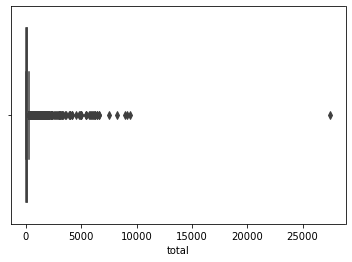

In [13]:
sns.boxplot(data['total'])

## WE can see that we have an outlier in target varibale its better to drop this

<AxesSubplot:xlabel='total', ylabel='Density'>

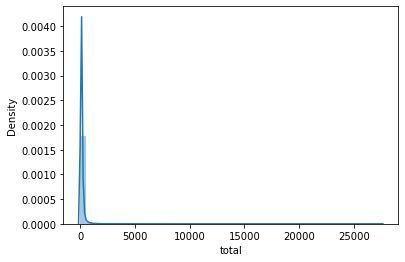

In [14]:
sns.distplot(data['total'])

In [15]:
data[data['total']>10000]

date  store                   name                address  \
2420  2014-11-17   3814  Costco Wholesale #788  7205 MILLS CIVIC PKWY   

                 city zipcode  \
2420  WEST DES MOINES   50266   

                                         store_location  county_number  \
2420  7205 MILLS CIVIC PKWY\nWEST DES MOINES 50266\n...             25   

      county   category  ... vendor_no           vendor item  \
2420  Dallas  1701100.0  ...       260  Diageo Americas  866   

                          description pack  liter_size  state_btl_cost  \
2420  Johnnie Walker Blue w/2 Glasses    3         750           130.0   

      btl_price  bottle_qty    total  
2420      195.0         141  27495.0  

[1 rows x 21 columns]

In [16]:
data.drop(data[(data['total']>10000)].index,axis=0,inplace=True)

<AxesSubplot:xlabel='total'>

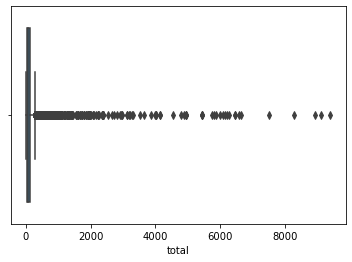

In [17]:
sns.boxplot(data['total'])

In [18]:
data['total'].max()

9402.0

<AxesSubplot:xlabel='total', ylabel='Density'>

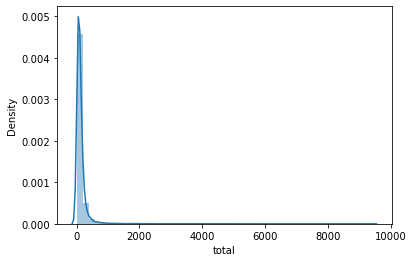

In [19]:
sns.distplot(data['total'])

In [20]:
data.columns

Index(['date', 'store', 'name', 'address', 'city', 'zipcode', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'vendor_no',
       'vendor', 'item', 'description', 'pack', 'liter_size', 'state_btl_cost',
       'btl_price', 'bottle_qty', 'total'],
      dtype='object')

In [21]:
for columns in data.select_dtypes(include=[object]).columns:
    print(f"In {columns} Total unique features are {data[columns].nunique()} ")

In date Total unique features are 229 
In name Total unique features are 790 
In address Total unique features are 657 
In city Total unique features are 193 
In zipcode Total unique features are 224 
In store_location Total unique features are 659 
In county Total unique features are 90 
In category_name Total unique features are 48 
In vendor Total unique features are 105 
In description Total unique features are 795 


### Categorical features

In [22]:
data['date']=pd.to_datetime(data['date'])
data['weekday']=data['date'].dt.day_name()
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [23]:
data.drop('date',axis=1,inplace=True)

In [24]:
numerical_features=data.select_dtypes(include=[int,float]).columns
categorical_features=data.select_dtypes(exclude=[int,float]).columns

In [25]:
data[numerical_features]

store  county_number   category  vendor_no   item  pack  liter_size  \
0       2190             77  1081600.0        421  64858     1        3000   
1       2190             77  1081600.0        421  64858     1        3000   
2       2190             77  1081600.0        421  64858     1        3000   
3       2190             77  1081600.0        421  64858     1        3000   
4       2190             77  1081600.0        421  64858     1        3000   
...      ...            ...        ...        ...    ...   ...         ...   
14995   2508             57  1071100.0        395  58868     6        1750   
14996   2508             57  1071100.0        395  58872     6        1750   
14997   2508             57  1071100.0        395  58873     6        1750   
14998   2508             57  1071100.0        395  58875     6        1750   
14999   2508             57  1071100.0        395  58875     6        1750   

       state_btl_cost  btl_price  bottle_qty   total  day  month  year  
0               29.72      44.58           6  267.48   19      2  2015  
1               29.72      44.58           5  222.90    9      2  2015  
2               29.72      44.58           6  267.48   30     10  2014  
3               29.72      44.58           1   44.58   27      2  2014  
4               29.72      44.58           1   44.58   25      2  2014  
...               ...        ...         ...     ...  ...    ...   ...  
14995            8.20      12.30          18  221.40   12      2  2014  
14996            8.20      12.30           6   73.80    9      9  2014  
14997            8.20      12.30          12  147.60   12      2  2014  
14998           10.50      15.74           6   94.44    8      1  2014  
14999            9.50      14.74          12  176.88   12      3  2014  

[14995 rows x 14 columns]

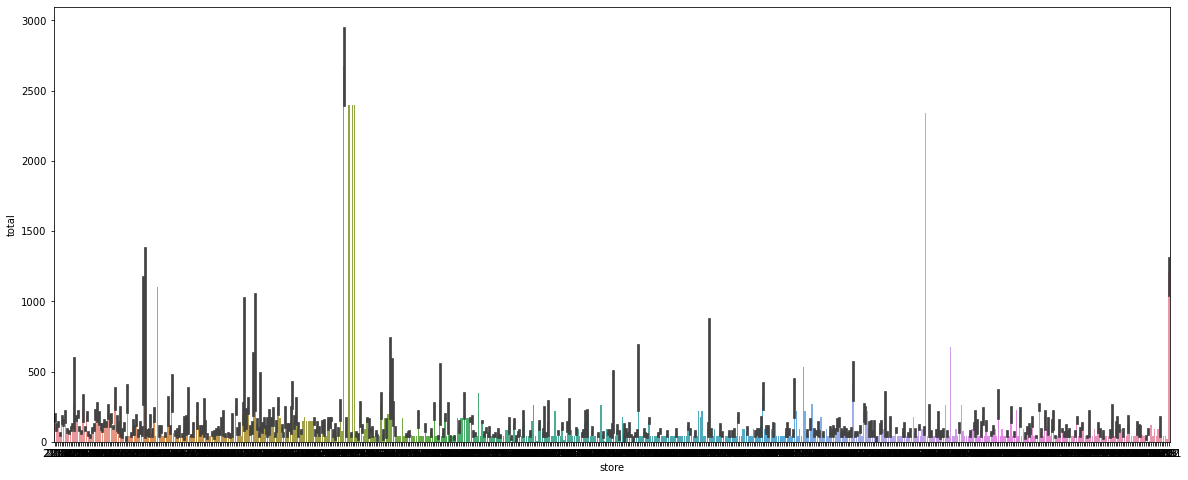

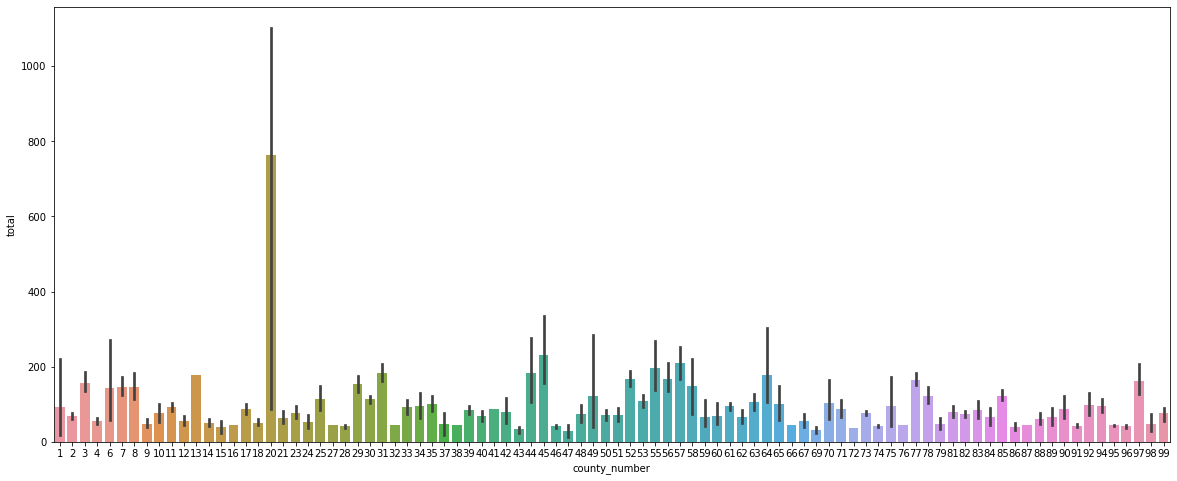

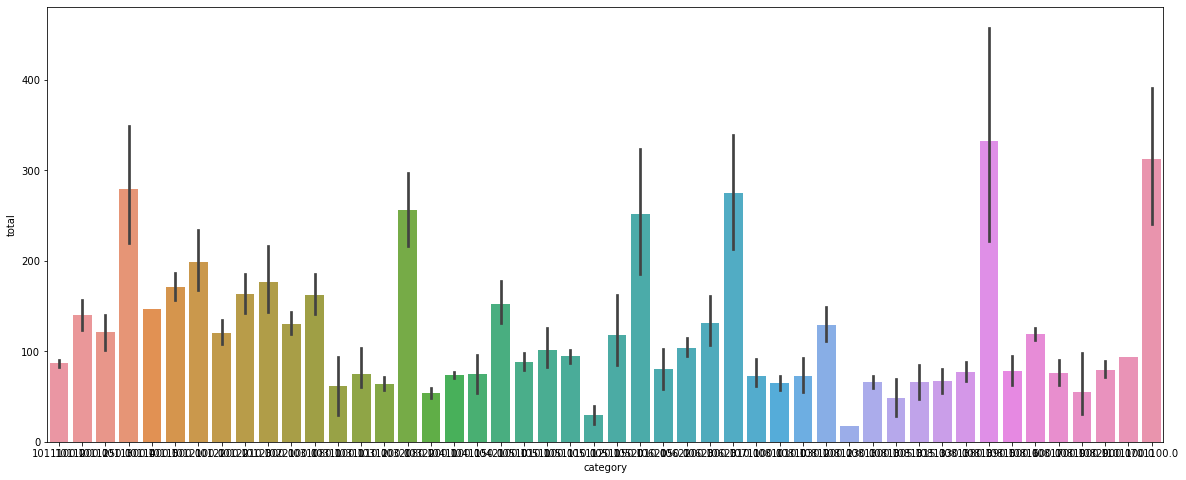

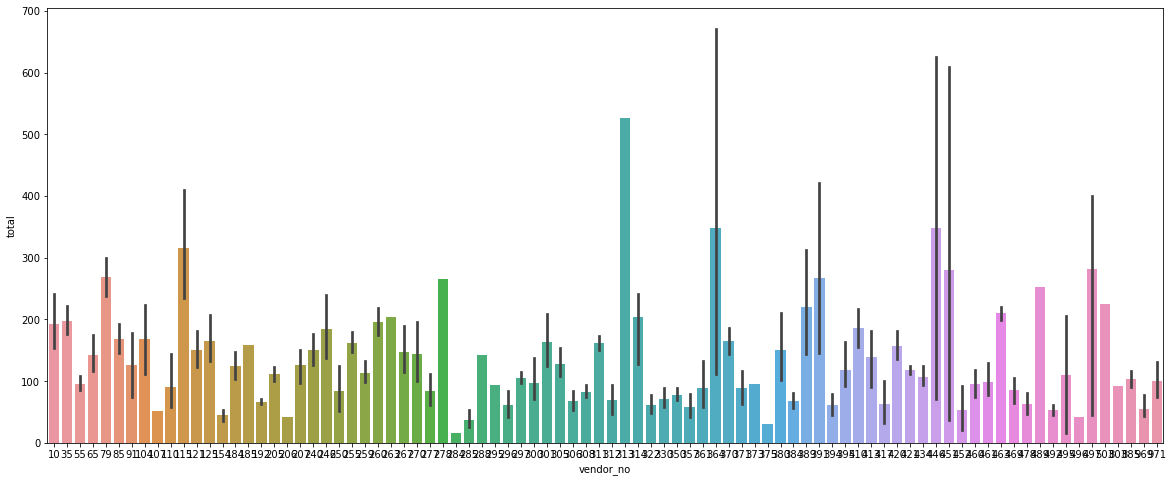

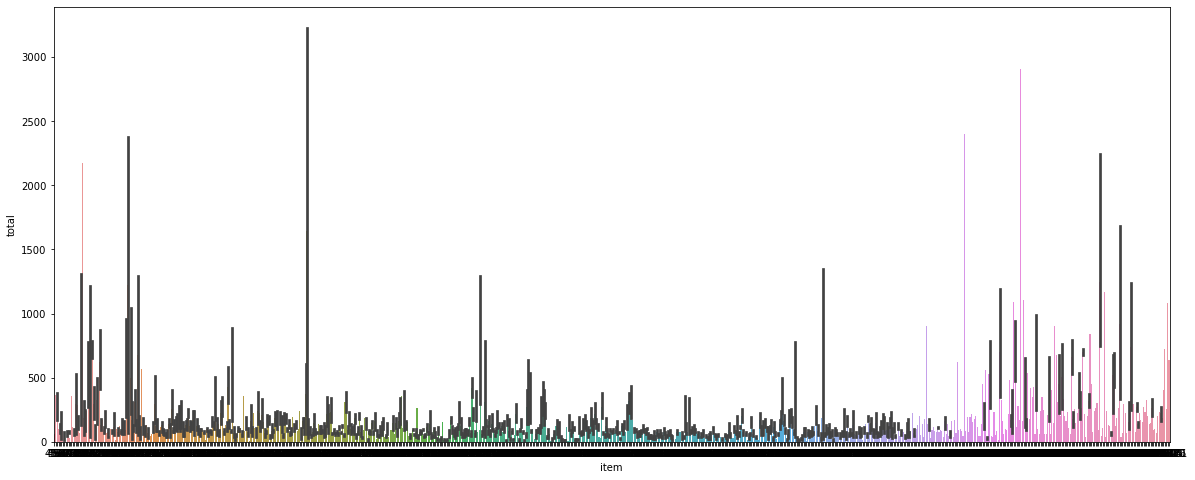

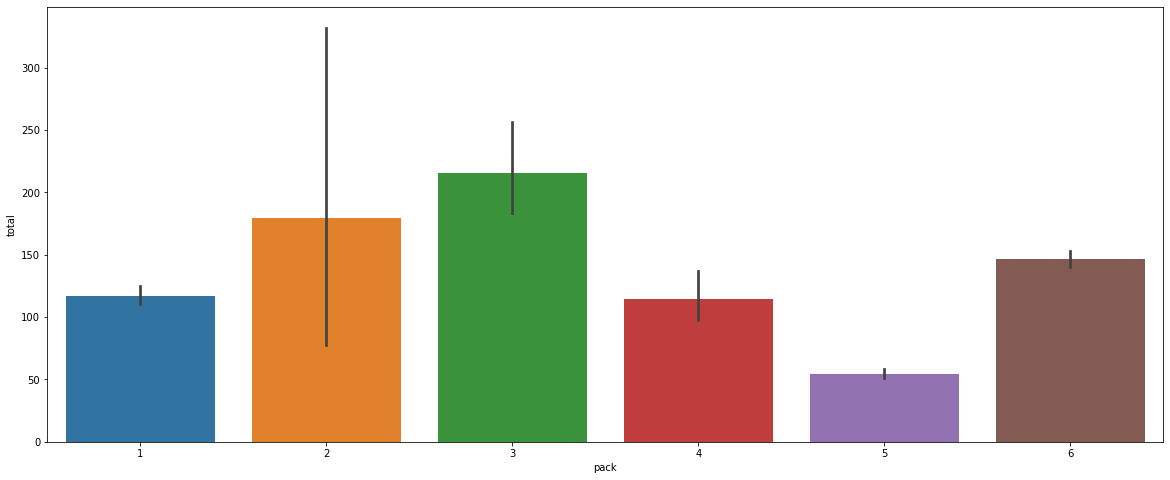

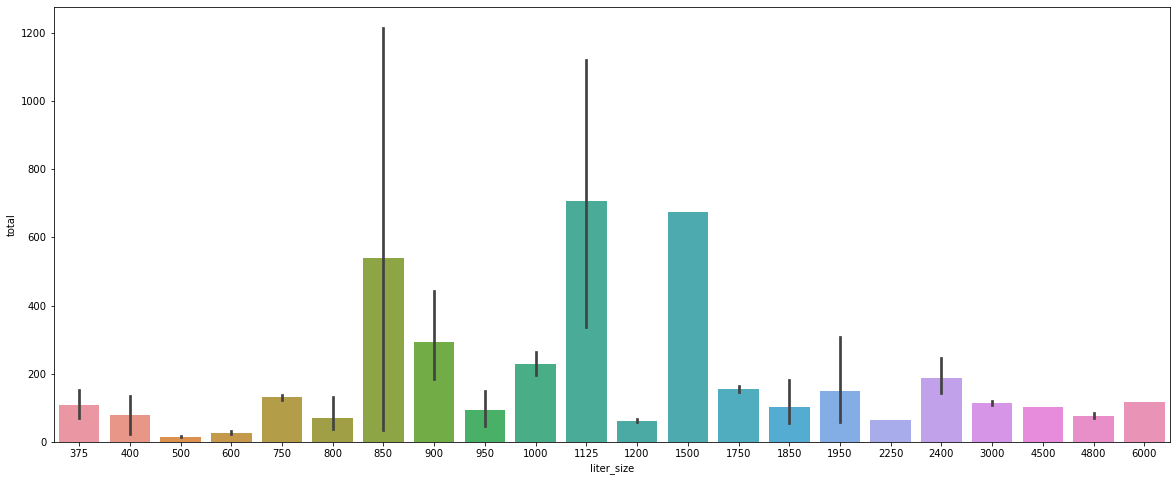

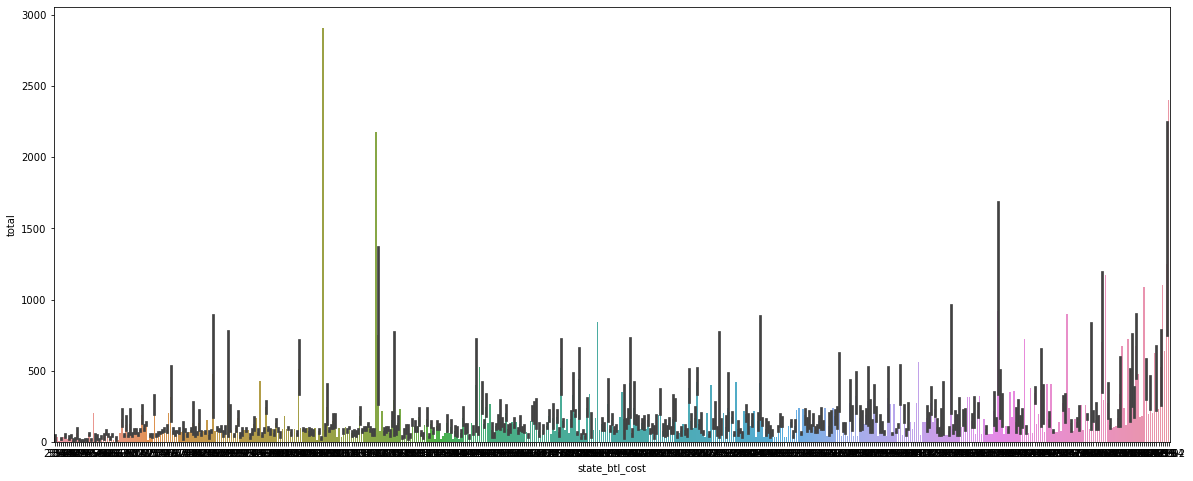

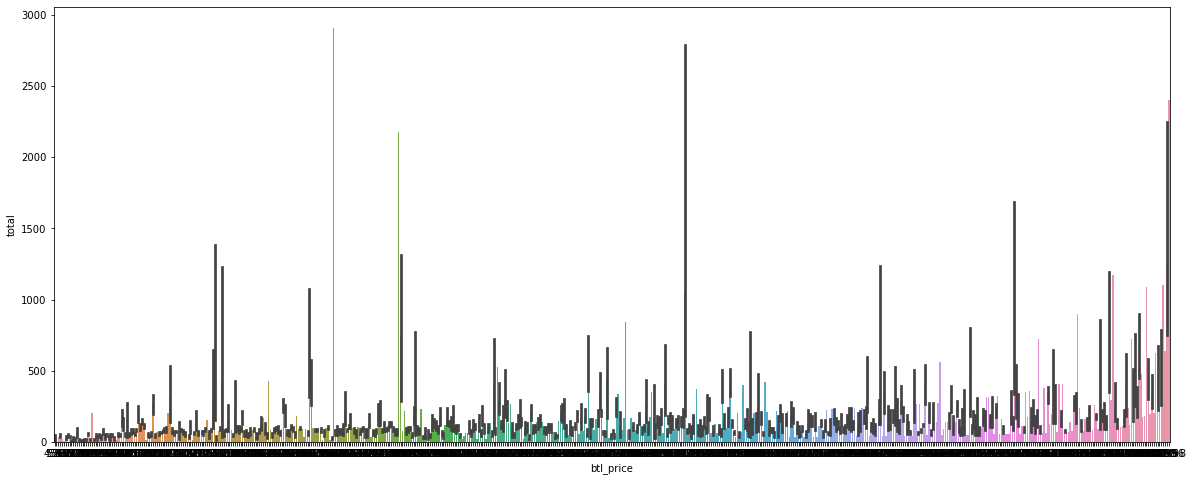

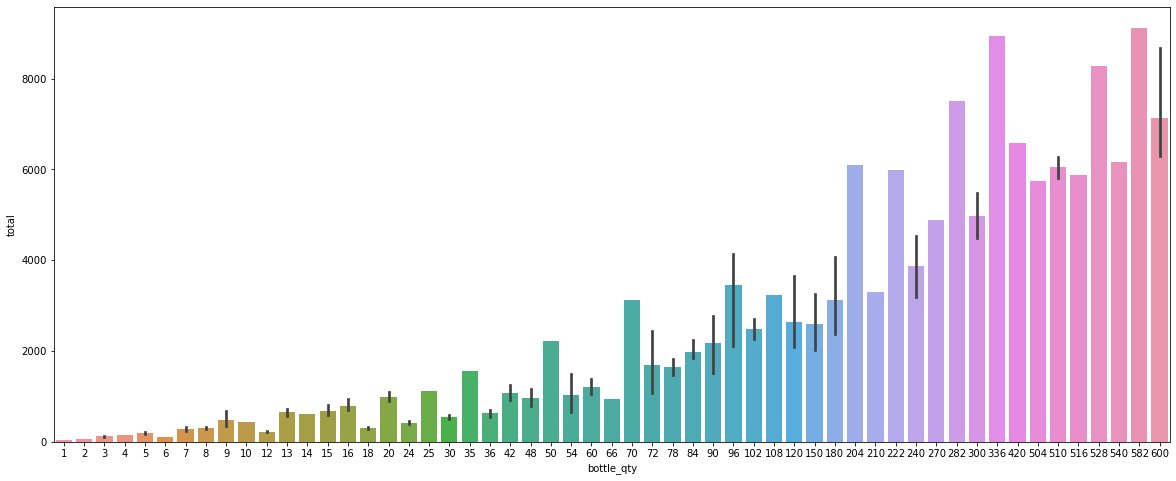

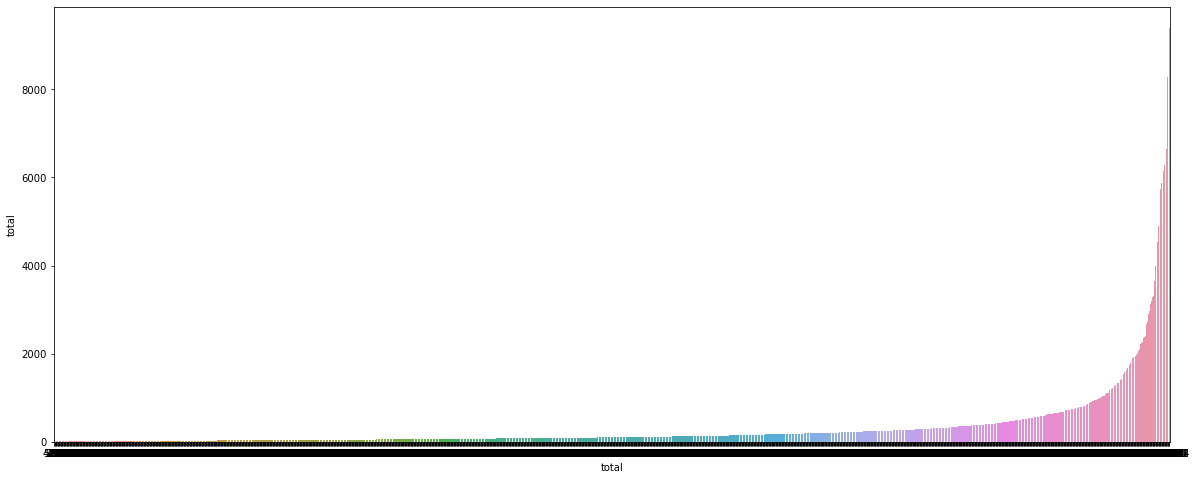

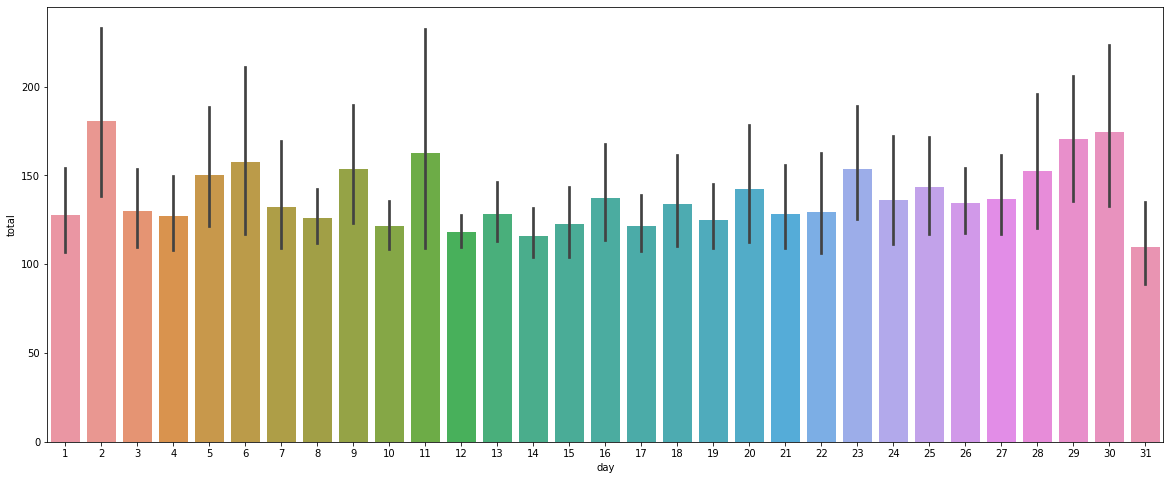

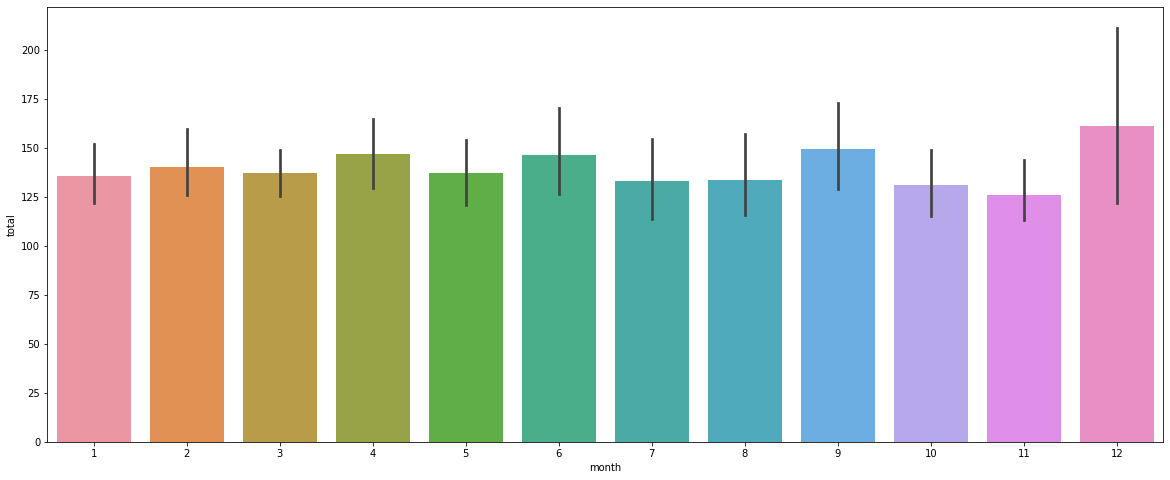

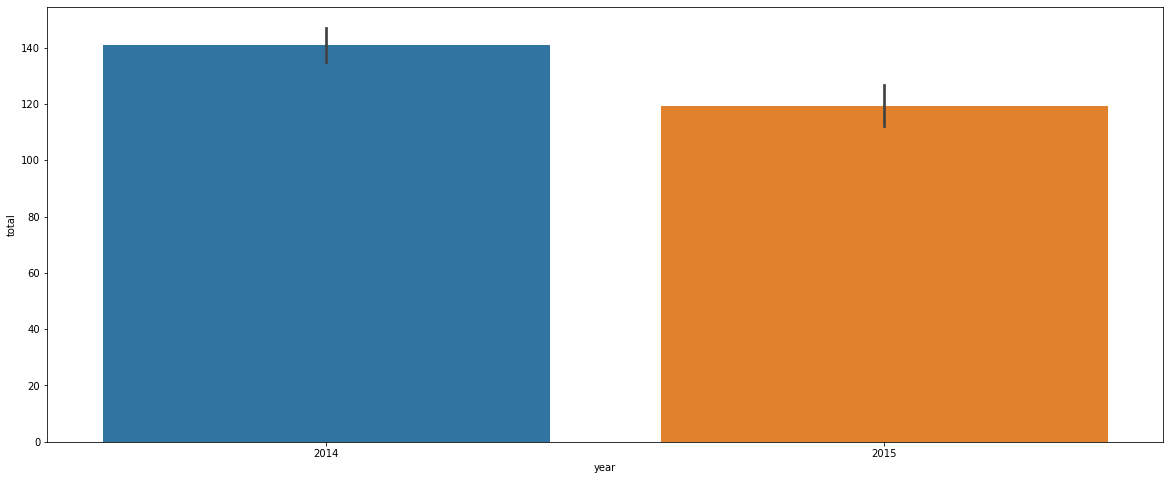

In [26]:
for columns in data[numerical_features]:
    plt.figure(figsize=(20,8))
    sns.barplot(x=data[columns],y=data['total'])
    plt.show()

In [27]:
data[numerical_features].columns

Index(['store', 'county_number', 'category', 'vendor_no', 'item', 'pack',
       'liter_size', 'state_btl_cost', 'btl_price', 'bottle_qty', 'total',
       'day', 'month', 'year'],
      dtype='object')

### Encoding the discrete variables and categorical variables

In [28]:
data[categorical_features][:]

name                   address  \
0                Central City Liquor, Inc.              1460 2ND AVE   
1                Central City Liquor, Inc.              1460 2ND AVE   
2                 Central City Liquor Inc.              1460 2ND AVE   
3                 Central City Liquor Inc.              1460 2ND AVE   
4                 Central City Liquor Inc.              1460 2ND AVE   
...                                    ...                       ...   
14995            Hy-vee Food Store #1/ceda  1843 JOHNSON AVENUE N.W.   
14996  Hy-Vee Food Store #1 / Cedar Rapids  1843 JOHNSON AVENUE N.W.   
14997            Hy-vee Food Store #1/ceda  1843 JOHNSON AVENUE N.W.   
14998            Hy-vee Food Store #1/ceda  1843 JOHNSON AVENUE N.W.   
14999    Hy-vee Food Store #1/Cedar Rapids  1843 JOHNSON AVENUE N.W.   

               city zipcode  \
0        DES MOINES   50314   
1        DES MOINES   50314   
2        DES MOINES   50314   
3        DES MOINES   50314   
4        DES MOINES   50314   
...             ...     ...   
14995  CEDAR RAPIDS   52405   
14996  CEDAR RAPIDS   52405   
14997  CEDAR RAPIDS   52405   
14998  CEDAR RAPIDS   52405   
14999  CEDAR RAPIDS   52405   

                                          store_location county  \
0      1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...   Polk   
1      1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...   Polk   
2      1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...   Polk   
3      1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...   Polk   
4      1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...   Polk   
...                                                  ...    ...   
14995  1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...   Linn   
14996  1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...   Linn   
14997  1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...   Linn   
14998  1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...   Linn   
14999  1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...   Linn   

            category_name             vendor  \
0         WHISKEY LIQUEUR  Sazerac Co., Inc.   
1         WHISKEY LIQUEUR  Sazerac Co., Inc.   
2         WHISKEY LIQUEUR   Sazerac Co. Inc.   
3         WHISKEY LIQUEUR   Sazerac Co. Inc.   
4         WHISKEY LIQUEUR   Sazerac Co. Inc.   
...                   ...                ...   
14995  AMERICAN COCKTAILS            Proximo   
14996  AMERICAN COCKTAILS            Proximo   
14997  AMERICAN COCKTAILS            Proximo   
14998  AMERICAN COCKTAILS            Proximo   
14999  AMERICAN COCKTAILS            Proximo   

                                      description    weekday  
0        Fireball Cinnamon Whiskey Mini Dispenser   Thursday  
1        Fireball Cinnamon Whiskey Mini Dispenser     Monday  
2        Fireball Cinnamon Whiskey Mini Dispenser   Thursday  
3        Fireball Cinnamon Whiskey Mini Dispenser   Thursday  
4        Fireball Cinnamon Whiskey Mini Dispenser    Tuesday  
...                                           ...        ...  
14995  Jose Cuervo Authentic Strawberry Margarita  Wednesday  
14996  Jose Cuervo Authentic Light Margarita Lime    Tuesday  
14997  Jose Cuervo Authentic Watermelon Margarita  Wednesday  
14998                Jose Cuervo Golden Margarita  Wednesday  
14999                Jose Cuervo Golden Margarita  Wednesday  

[14995 rows x 10 columns]

### Frequency encoding and Mean encoding we will check the variablity

In [29]:
for categories in categorical_features:
    category_dict=data[categories].value_counts().sort_values(ascending=False).to_dict()
    data[categories+'_Enc']=data[categories].map(category_dict)

In [30]:
data2=data.copy()

In [31]:
for categories in categorical_features:
    category_dict=data2.groupby(categories)['total'].mean().sort_values(ascending=False).to_dict()
    data2[categories+'_Enc']=data2[categories].map(category_dict)

In [32]:
data[numerical_features]

store  county_number   category  vendor_no   item  pack  liter_size  \
0       2190             77  1081600.0        421  64858     1        3000   
1       2190             77  1081600.0        421  64858     1        3000   
2       2190             77  1081600.0        421  64858     1        3000   
3       2190             77  1081600.0        421  64858     1        3000   
4       2190             77  1081600.0        421  64858     1        3000   
...      ...            ...        ...        ...    ...   ...         ...   
14995   2508             57  1071100.0        395  58868     6        1750   
14996   2508             57  1071100.0        395  58872     6        1750   
14997   2508             57  1071100.0        395  58873     6        1750   
14998   2508             57  1071100.0        395  58875     6        1750   
14999   2508             57  1071100.0        395  58875     6        1750   

       state_btl_cost  btl_price  bottle_qty   total  day  month  year  
0               29.72      44.58           6  267.48   19      2  2015  
1               29.72      44.58           5  222.90    9      2  2015  
2               29.72      44.58           6  267.48   30     10  2014  
3               29.72      44.58           1   44.58   27      2  2014  
4               29.72      44.58           1   44.58   25      2  2014  
...               ...        ...         ...     ...  ...    ...   ...  
14995            8.20      12.30          18  221.40   12      2  2014  
14996            8.20      12.30           6   73.80    9      9  2014  
14997            8.20      12.30          12  147.60   12      2  2014  
14998           10.50      15.74           6   94.44    8      1  2014  
14999            9.50      14.74          12  176.88   12      3  2014  

[14995 rows x 14 columns]

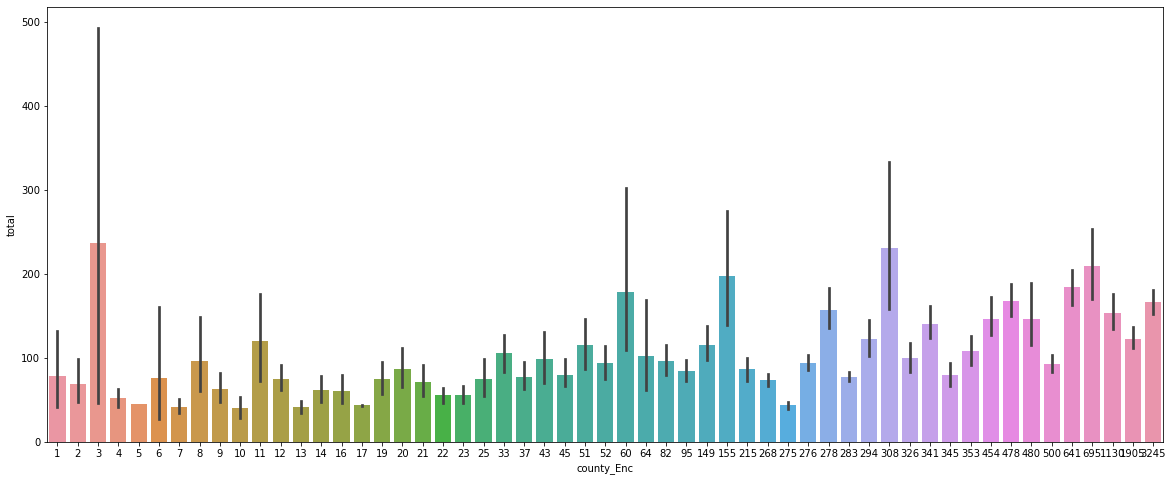

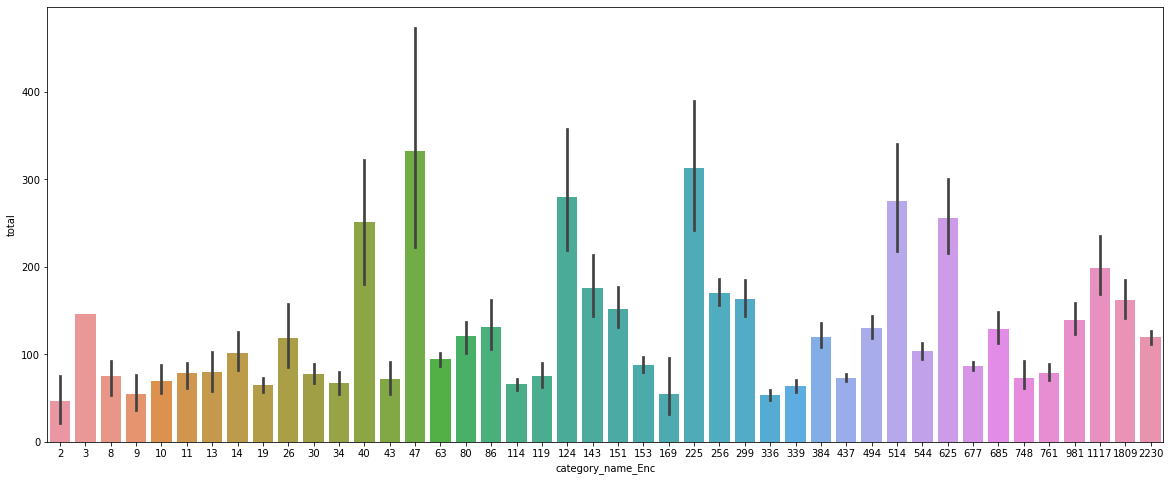

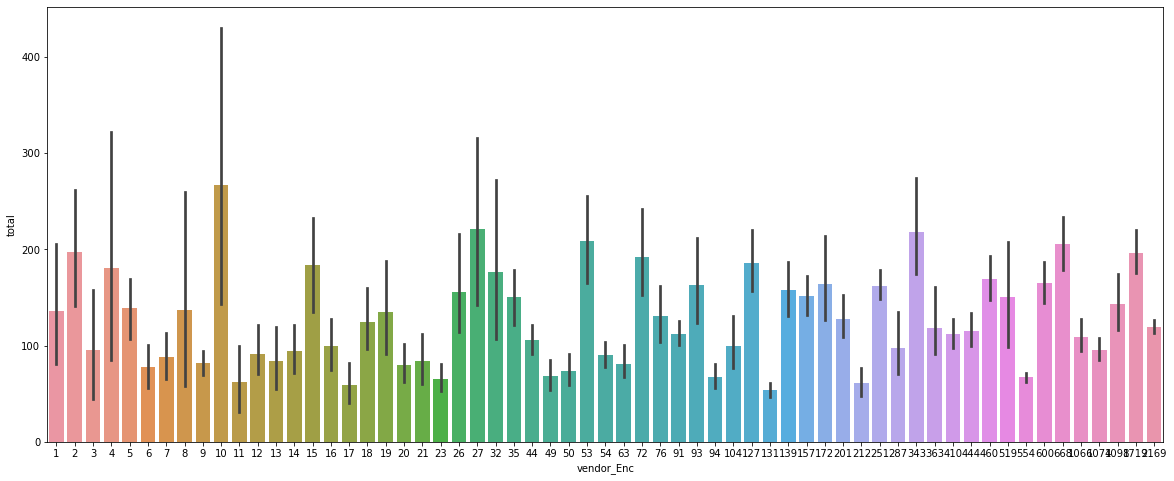

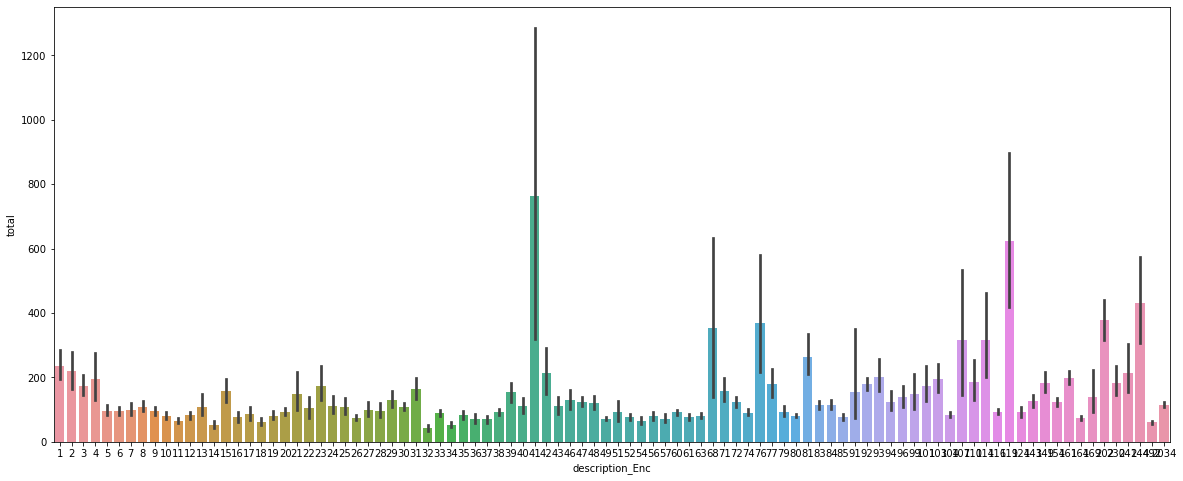

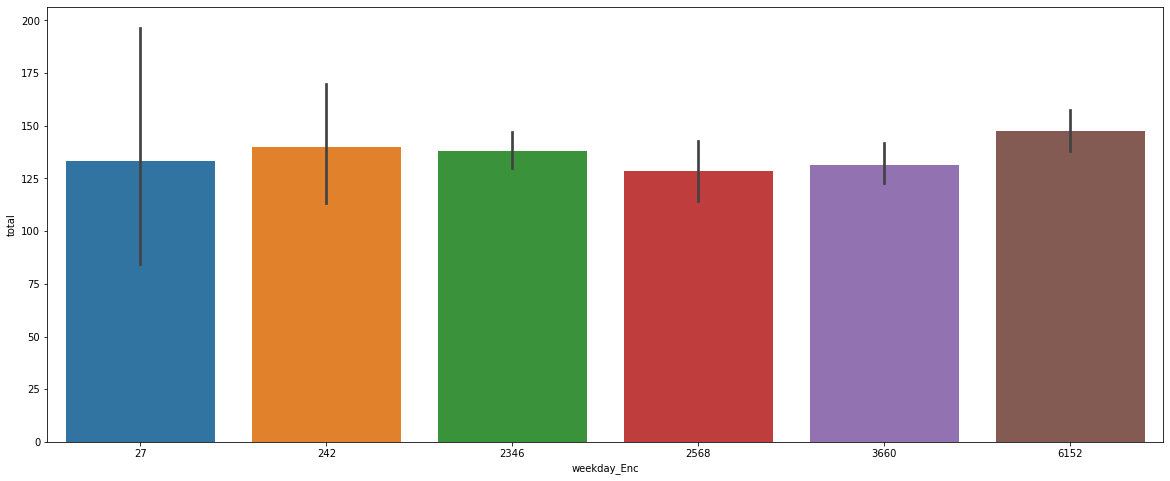

In [33]:
for columns in data.iloc[:,-5:]:
    plt.figure(figsize=(20,8))
    sns.barplot(x=data[columns],y=data['total'])
    plt.show()

In [34]:
numerical_features=numerical_features.drop('total')
numerical_features

Index(['store', 'county_number', 'category', 'vendor_no', 'item', 'pack',
       'liter_size', 'state_btl_cost', 'btl_price', 'bottle_qty', 'day',
       'month', 'year'],
      dtype='object')

In [35]:
numerical_features

Index(['store', 'county_number', 'category', 'vendor_no', 'item', 'pack',
       'liter_size', 'state_btl_cost', 'btl_price', 'bottle_qty', 'day',
       'month', 'year'],
      dtype='object')

<AxesSubplot:>

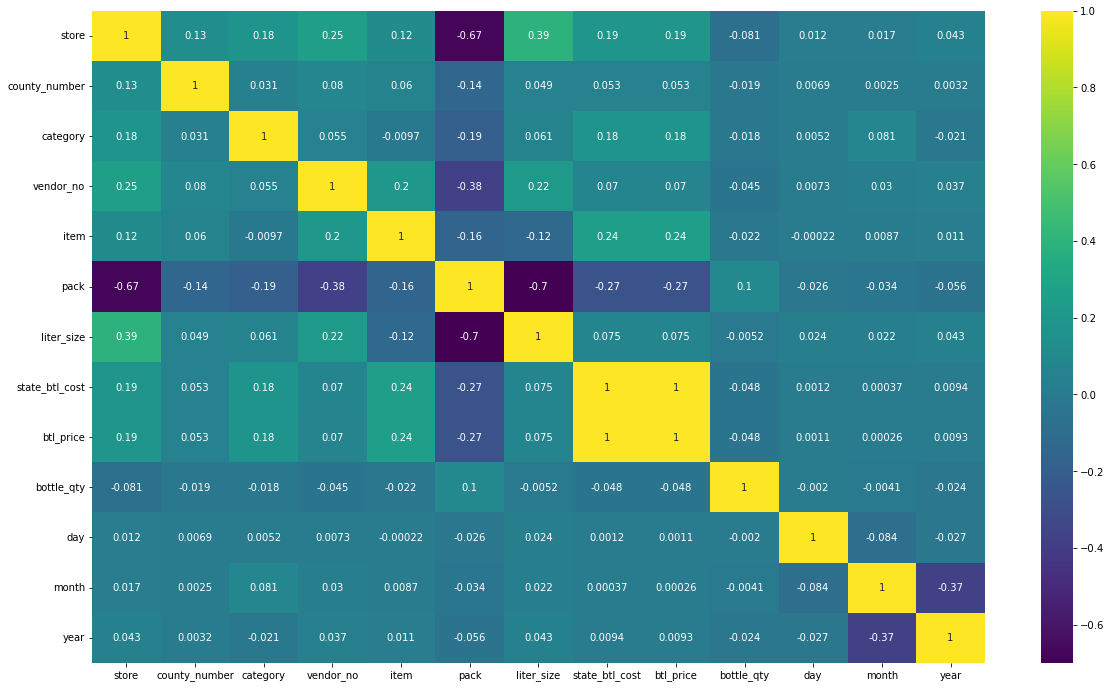

In [36]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numerical_features].corr(),annot=True,cmap='viridis')

<AxesSubplot:>

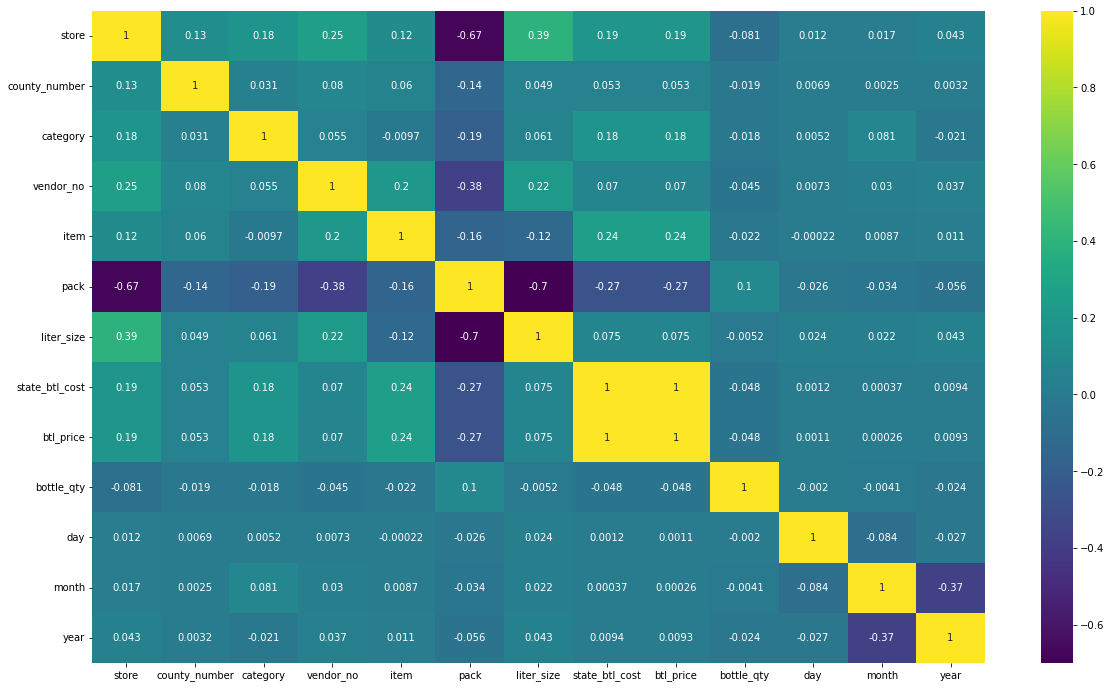

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(data2[numerical_features].corr(),annot=True,cmap='viridis')

### As we see that two features have more than 70% correlation we will drop one of those features

In [38]:
threshold=0.7
corr_list=[]
for column1 in numerical_features:
    for column2 in numerical_features:
        if column1!=column2:
            if (abs(round(data[[column1,column2]].corr(),2))>=threshold).iloc[1:,:1].values:
                flag=1
                if flag==1:
                    numerical_features=numerical_features.drop(column1)
                    corr_list.append(column1)
data.drop(corr_list,inplace=True,axis=1)  
data2.drop(corr_list,inplace=True,axis=1)

In [41]:
corr_list

['pack', 'state_btl_cost']

In [39]:
data2.columns

Index(['store', 'name', 'address', 'city', 'zipcode', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'vendor_no',
       'vendor', 'item', 'description', 'liter_size', 'btl_price',
       'bottle_qty', 'total', 'weekday', 'day', 'month', 'year', 'name_Enc',
       'address_Enc', 'city_Enc', 'zipcode_Enc', 'store_location_Enc',
       'county_Enc', 'category_name_Enc', 'vendor_Enc', 'description_Enc',
       'weekday_Enc'],
      dtype='object')

<AxesSubplot:>

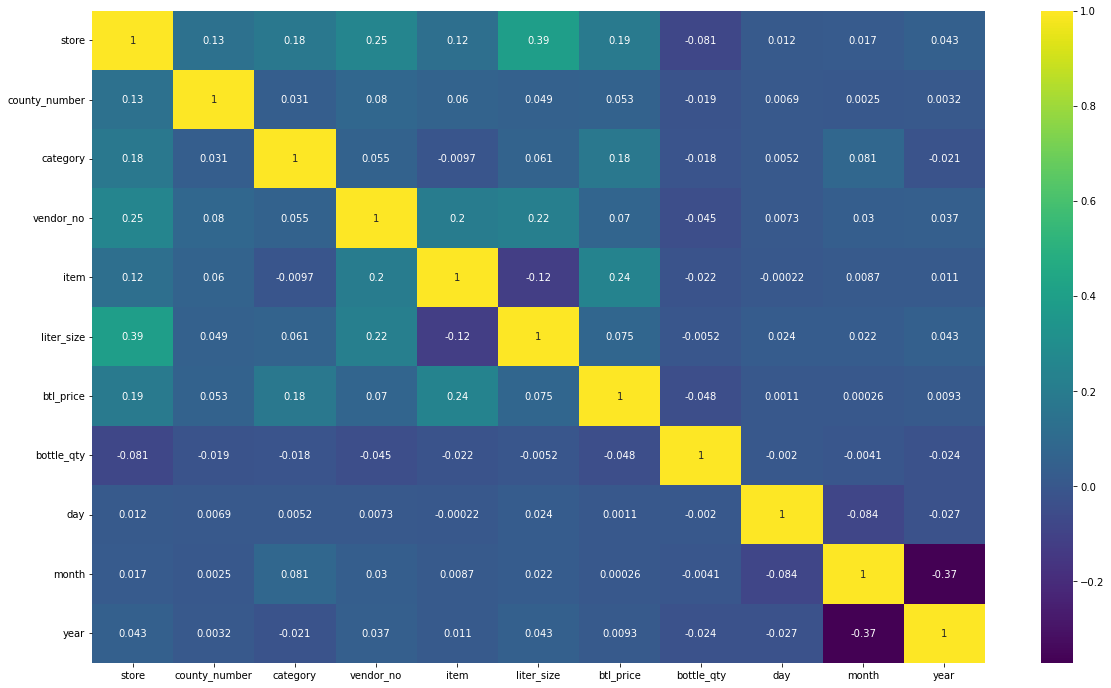

In [40]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numerical_features].corr(),annot=True,cmap='viridis')

<AxesSubplot:>

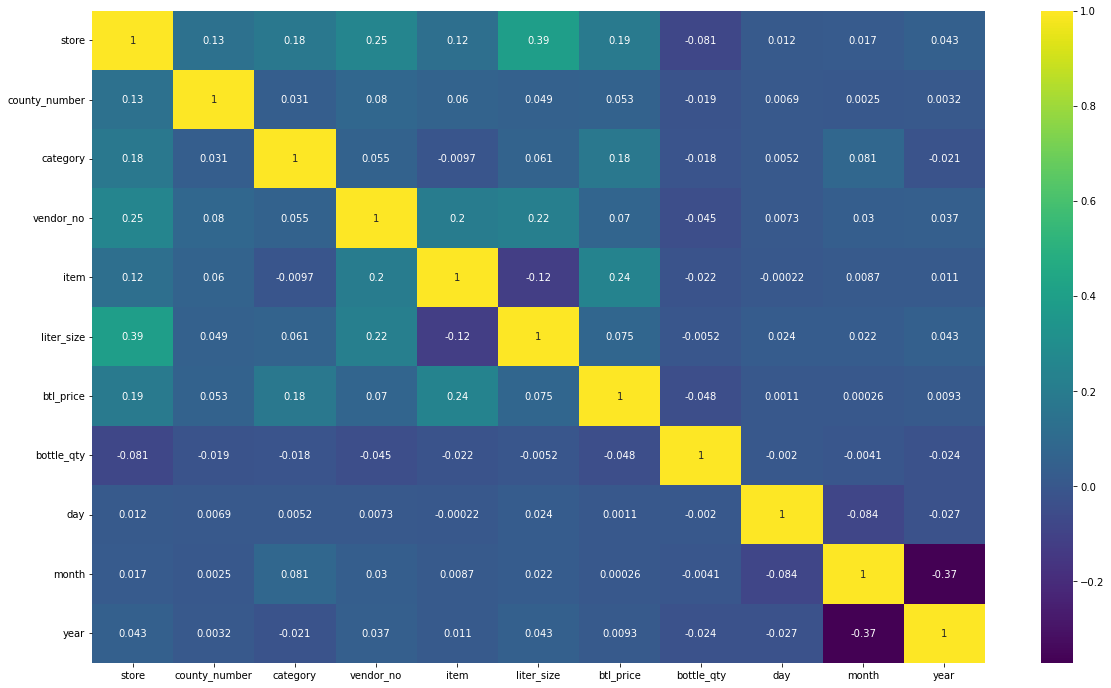

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(data2[numerical_features].corr(),annot=True,cmap='viridis')

### The numerical fetaures are now filtered lets drop the categorical features

In [42]:
data.drop(labels=categorical_features,axis=1,inplace=True)
data2.drop(labels=categorical_features,axis=1,inplace=True)

In [43]:
numerical_features

Index(['store', 'county_number', 'category', 'vendor_no', 'item', 'liter_size',
       'btl_price', 'bottle_qty', 'day', 'month', 'year'],
      dtype='object')

### Lets encode the numerical discrete variables

In [44]:
data.describe()

store  county_number      category     vendor_no           item  \
count  14995.000000   14995.000000  1.499500e+04  14995.000000   14995.000000   
mean    2676.040547      55.856219  1.055338e+06    273.773858   62023.001801   
std      715.266801      27.666524  8.458466e+04    151.799881  129532.848525   
min     2106.000000       1.000000  1.011100e+06     10.000000     411.000000   
25%     2285.000000      30.000000  1.012210e+06    115.000000   26828.000000   
50%     2500.000000      61.000000  1.032200e+06    270.000000   38178.000000   
75%     2508.000000      77.000000  1.081300e+06    421.000000   64858.000000   
max     9001.000000      99.000000  1.701100e+06    971.000000  995381.000000   

         liter_size     btl_price    bottle_qty         total           day  \
count  14995.000000  14995.000000  14995.000000  14995.000000  14995.000000   
mean    1656.420473     28.200495      6.449150    138.639712     15.667289   
std      734.839435     45.053414     19.904839    336.137040      8.711519   
min      375.000000      4.260000      1.000000      4.260000      1.000000   
25%     1000.000000     13.500000      2.000000     44.580000      8.000000   
50%     1750.000000     22.130000      6.000000     82.260000     16.000000   
75%     1750.000000     43.040000      6.000000    135.000000     23.000000   
max     6000.000000   2398.800000    600.000000   9402.000000     31.000000   

       ...      name_Enc   address_Enc      city_Enc   zipcode_Enc  \
count  ...  14995.000000  14995.000000  14995.000000  14995.000000   
mean   ...    280.754185    415.363588    810.167989    603.395465   
std    ...    246.522487    356.770035    715.448147    591.528859   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...     56.000000     73.000000    269.000000    149.000000   
50%    ...    269.000000    318.000000    500.000000    343.000000   
75%    ...    369.000000    793.000000   1894.000000   1049.000000   
max    ...    906.000000   1014.000000   1958.000000   1888.000000   

       store_location_Enc    county_Enc  category_name_Enc    vendor_Enc  \
count        14995.000000  14995.000000       14995.000000  14995.000000   
mean           415.326375   1236.983461         977.219673    926.737646   
std            356.810646   1183.482879         705.997691    705.560489   
min              1.000000      1.000000           2.000000      1.000000   
25%             73.000000    308.000000         437.000000    343.000000   
50%            318.000000    641.000000         748.000000    668.000000   
75%            793.000000   1905.000000        1809.000000   1719.000000   
max           1014.000000   3245.000000        2230.000000   2169.000000   

       description_Enc   weekday_Enc  
count     14995.000000  14995.000000  
mean        349.923775   4228.098499  
std         673.931958   1706.434605  
min           1.000000     27.000000  
25%          23.000000   2568.000000  
50%          74.000000   3660.000000  
75%         164.000000   6152.000000  
max        2034.000000   6152.000000  

[8 rows x 22 columns]

### We know that store county number category vendor no item liter size are discrete variables

In [45]:
data.columns[-8:]

Index(['city_Enc', 'zipcode_Enc', 'store_location_Enc', 'county_Enc',
       'category_name_Enc', 'vendor_Enc', 'description_Enc', 'weekday_Enc'],
      dtype='object')

In [46]:
data2.columns[-8:]

Index(['city_Enc', 'zipcode_Enc', 'store_location_Enc', 'county_Enc',
       'category_name_Enc', 'vendor_Enc', 'description_Enc', 'weekday_Enc'],
      dtype='object')

In [47]:
for categories in data.iloc[:,:8] :
    category_dict=data[categories].value_counts().sort_values(ascending=False).to_dict()
    data[categories+'_Enc']=data[categories].map(category_dict)

In [48]:
for categories in data2.iloc[:,:8] :
    category_dict=data2.groupby(categories)['total'].mean().sort_values(ascending=False).to_dict()
    data2[categories+'_Enc']=data2[categories].map(category_dict)

In [49]:
# for categories in data.iloc[:,9:12]:
#     category_dict=data[categories].value_counts().sort_values(ascending=False).to_dict()
#     data[categories+'_Enc']=data[categories].map(category_dict)    

In [50]:
data.drop(data.columns[:8],axis=1,inplace=True)
data2.drop(data2.columns[:8],axis=1,inplace=True)

In [51]:
# for categories in data2.iloc[:,1:4] :
#     category_dict=data2.groupby(categories)['total'].mean().sort_values(ascending=False).to_dict()
#     data2[categories+'_Enc']=data2[categories].map(category_dict)

In [52]:
for categories in data2.iloc[:,1:4] :
    category_dict=data2[categories].value_counts().sort_values(ascending=False).to_dict()
    data2[categories+'_Enc']=data2[categories].map(category_dict)

In [53]:
data2.drop(data2.columns[1:4],axis=1,inplace=True)

In [54]:
data2

total    name_Enc  address_Enc    city_Enc  zipcode_Enc  \
0      267.48  123.723889   136.271016  143.857007   136.565234   
1      222.90  123.723889   136.271016  143.857007   136.565234   
2      267.48  137.766700   136.271016  143.857007   136.565234   
3       44.58  137.766700   136.271016  143.857007   136.565234   
4       44.58  137.766700   136.271016  143.857007   136.565234   
...       ...         ...          ...         ...          ...   
14995  221.40  427.241250   328.669375  216.838915   273.112905   
14996   73.80  296.769103   328.669375  216.838915   273.112905   
14997  147.60  427.241250   328.669375  216.838915   273.112905   
14998   94.44  427.241250   328.669375  216.838915   273.112905   
14999  176.88  166.863830   328.669375  216.838915   273.112905   

       store_location_Enc  county_Enc  category_name_Enc  vendor_Enc  \
0              136.271016  166.077948         119.543175  111.804220   
1              136.271016  166.077948         119.543175  111.804220   
2              136.271016  166.077948         119.543175  119.626994   
3              136.271016  166.077948         119.543175  119.626994   
4              136.271016  166.077948         119.543175  119.626994   
...                   ...         ...                ...         ...   
14995          328.669375  209.791712          73.216658  118.502066   
14996          328.669375  209.791712          73.216658  118.502066   
14997          328.669375  209.791712          73.216658  118.502066   
14998          328.669375  209.791712          73.216658  118.502066   
14999          328.669375  209.791712          73.216658  118.502066   

       description_Enc  ...  county_number_Enc  category_Enc  vendor_no_Enc  \
0           115.066372  ...         166.077948    119.543175     118.383358   
1           115.066372  ...         166.077948    119.543175     118.383358   
2           115.066372  ...         166.077948    119.543175     118.383358   
3           115.066372  ...         166.077948    119.543175     118.383358   
4           115.066372  ...         166.077948    119.543175     118.383358   
...                ...  ...                ...           ...            ...   
14995        78.839286  ...         209.791712     73.216658     118.502066   
14996        91.887500  ...         209.791712     73.216658     118.502066   
14997        89.076923  ...         209.791712     73.216658     118.502066   
14998        85.129459  ...         209.791712     73.216658     118.502066   
14999        85.129459  ...         209.791712     73.216658     118.502066   

         item_Enc  liter_size_Enc  btl_price_Enc  bottle_qty_Enc  day_Enc  \
0      115.066372      113.245144     115.066372      114.342023      657   
1      115.066372      113.245144     115.066372      193.638489      529   
2      115.066372      113.245144     115.066372      114.342023      464   
3      115.066372      113.245144     115.066372       42.235454      512   
4      115.066372      113.245144     115.066372       42.235454      403   
...           ...             ...            ...             ...      ...   
14995   78.839286      155.102652     133.509494      311.783058      568   
14996   91.887500      155.102652     133.509494      114.342023      529   
14997   89.076923      155.102652     133.509494      220.325296      568   
14998   85.129459      155.102652      81.794188      114.342023      516   
14999   85.129459      155.102652      84.471538      220.325296      568   

       month_Enc  year_Enc  
0           2175      1588  
1           2175      1588  
2           1018     13407  
3           2175     13407  
4           2175     13407  
...          ...       ...  
14995       2175     13407  
14996        871     13407  
14997       2175     13407  
14998       2243     13407  
14999       1574     13407  

[14995 rows x 22 columns]

In [55]:
# data.drop(data.columns[1:4],axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import scipy.stats as stat
robust=RobustScaler()
minmax=MinMaxScaler()
standard=StandardScaler()

In [57]:
def plot_curve(df,column):
    fig,axes=plt.subplots(2,4,figsize=(20,10))
    fig.suptitle(f"plot for {column}")
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='normal')
    sns.distplot(ax=axes[0,1],a=np.log1p(df[column]),axlabel='logarithmic')
    sns.distplot(ax=axes[0,2],a=(df[column])**(1/2),axlabel='sqrt')
    # sns.distplot(ax=axes[0,3],a=stat.boxcox(df[column])[0],axlabel='boxcox')
    sns.distplot(ax=axes[1,0],a=1/df[column],axlabel='reciprocal')
    sns.distplot(ax=axes[1,1],a=robust.fit_transform(df[[column]]),axlabel='robustscaler')
    sns.distplot(ax=axes[1,2],a=minmax.fit_transform(df[[column]]),axlabel='minmaxscaler')
    sns.distplot(ax=axes[1,3],a=standard.fit_transform(df[[column]]),axlabel='standardscaler')   

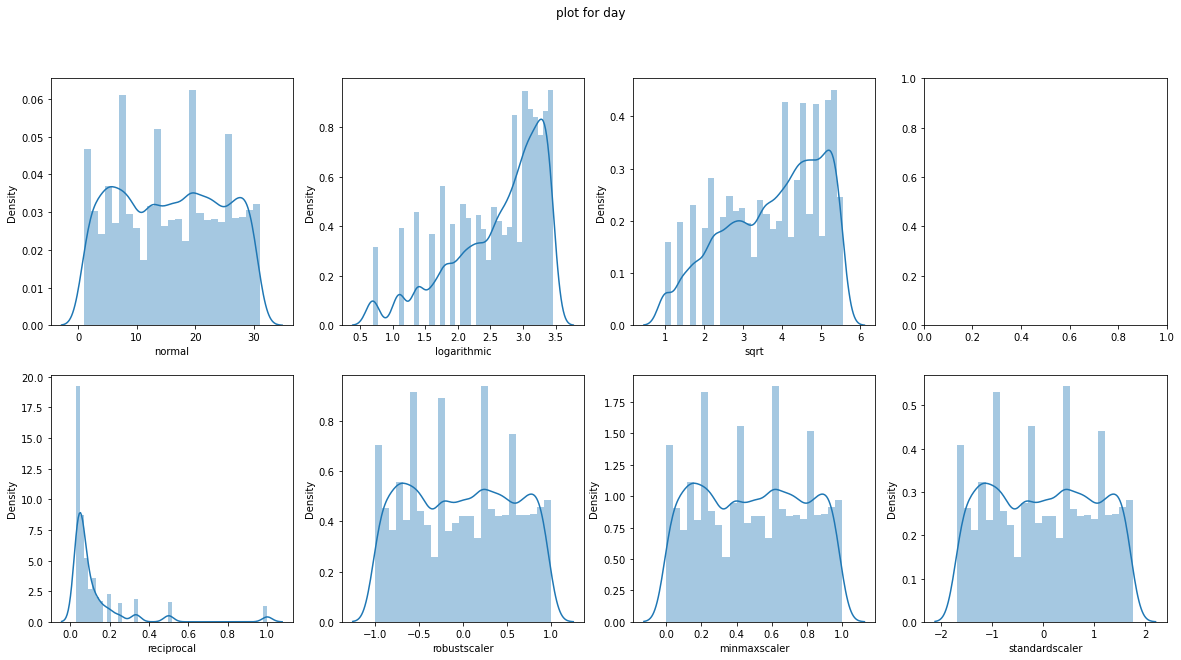

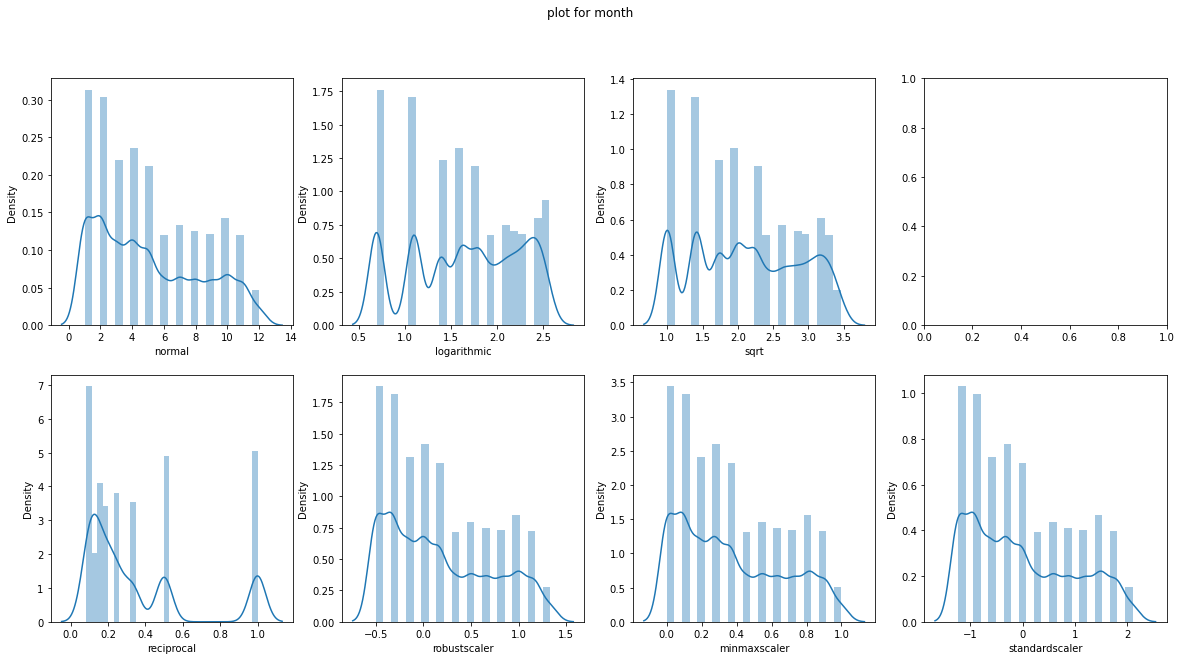

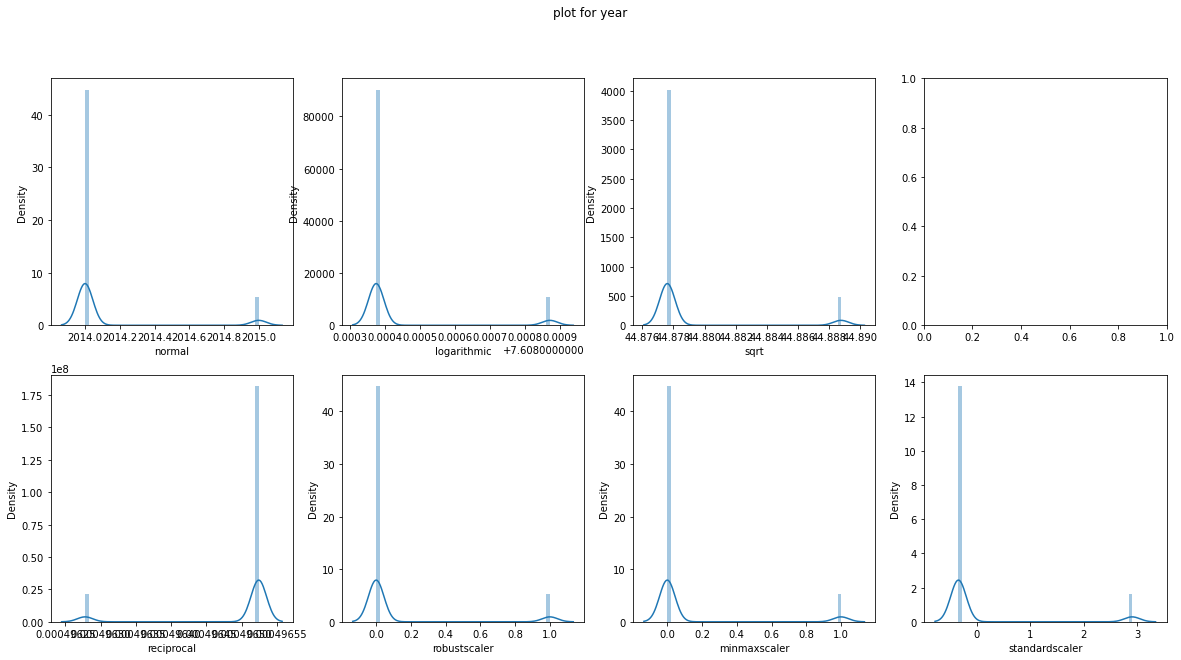

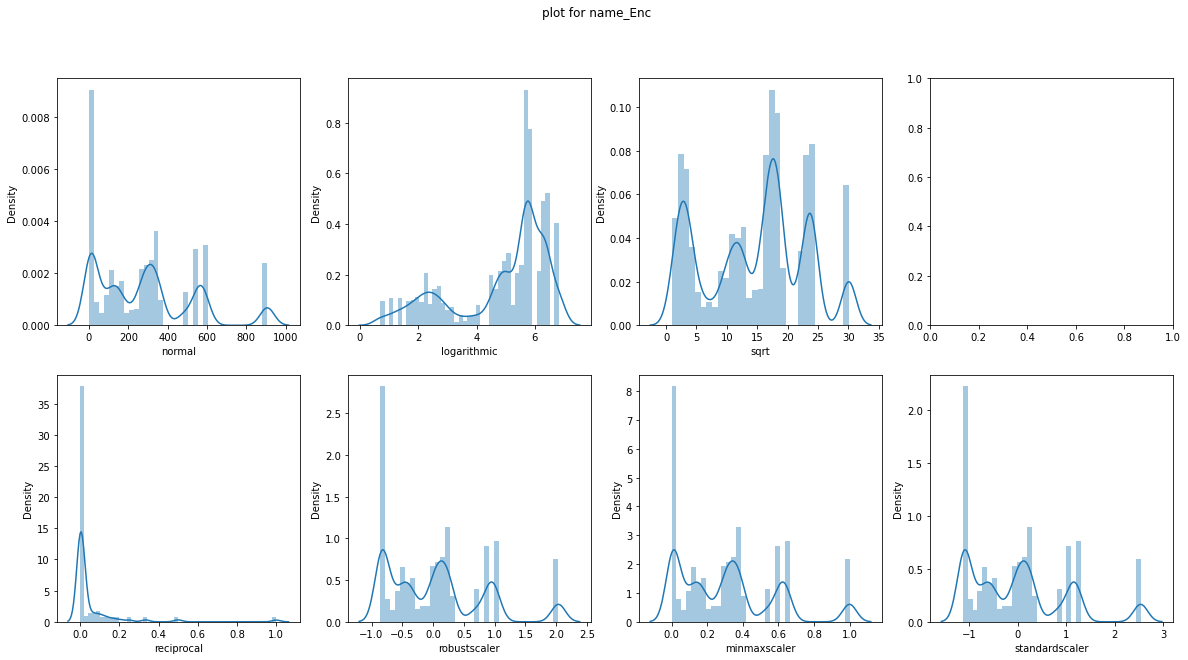

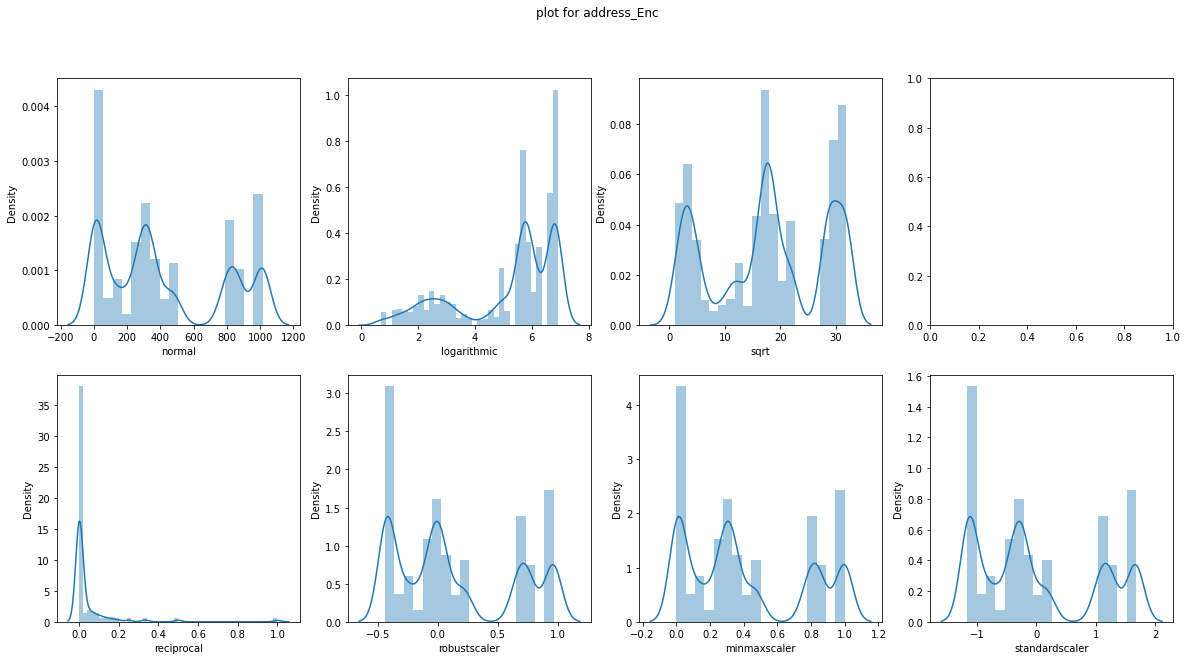

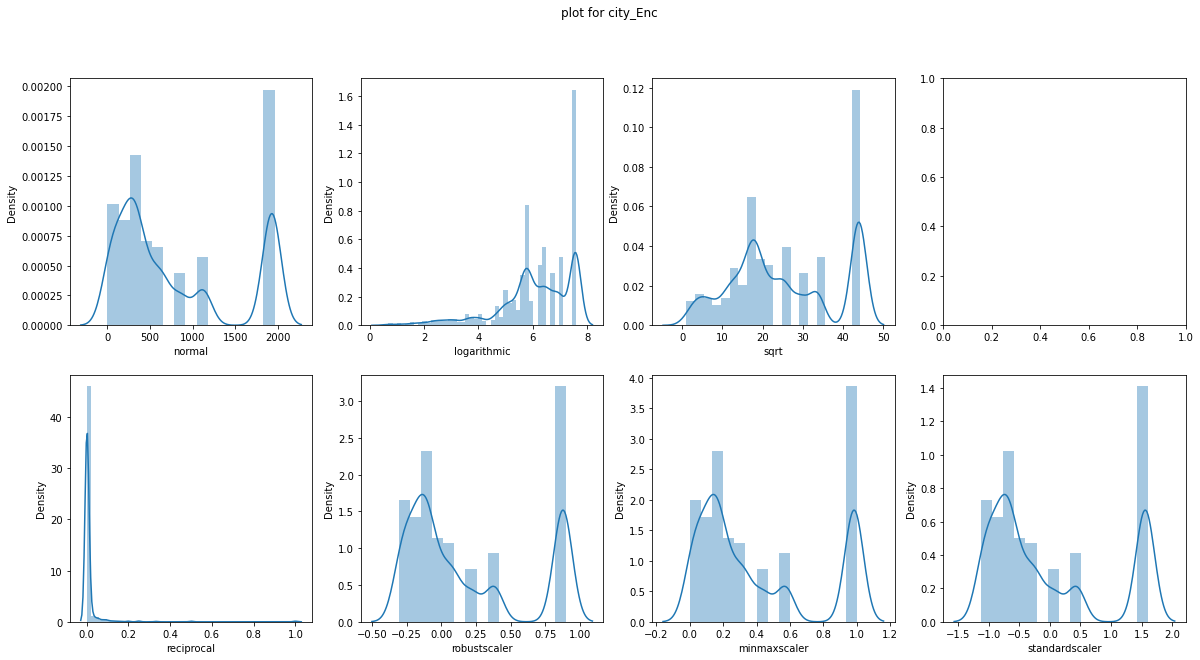

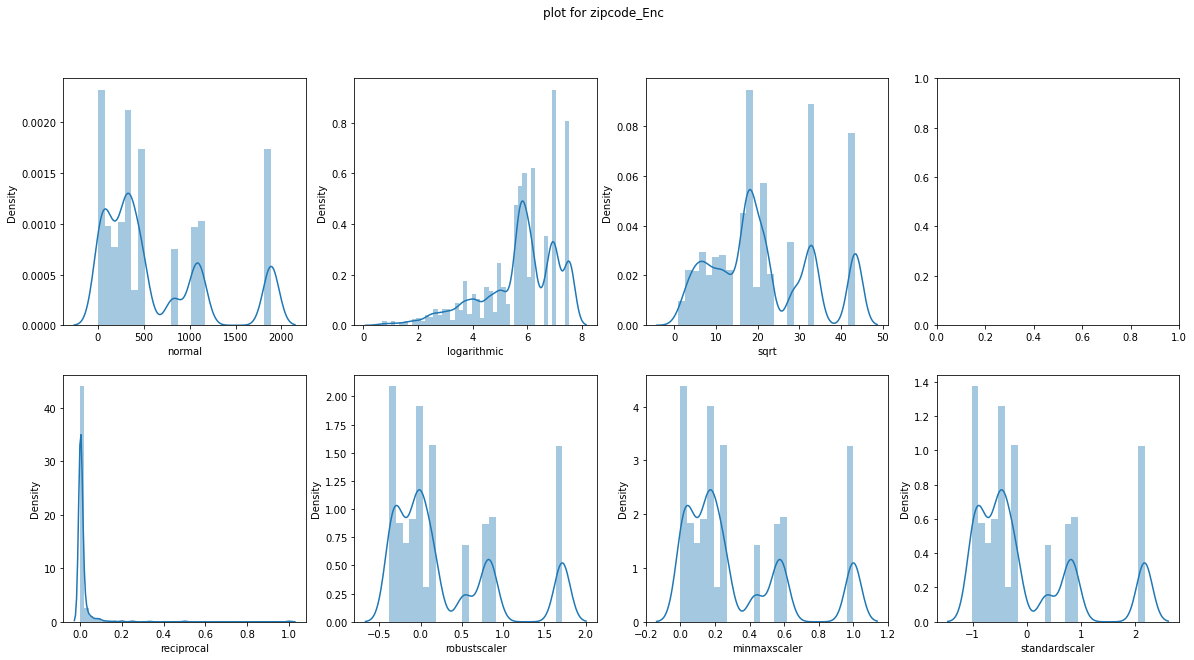

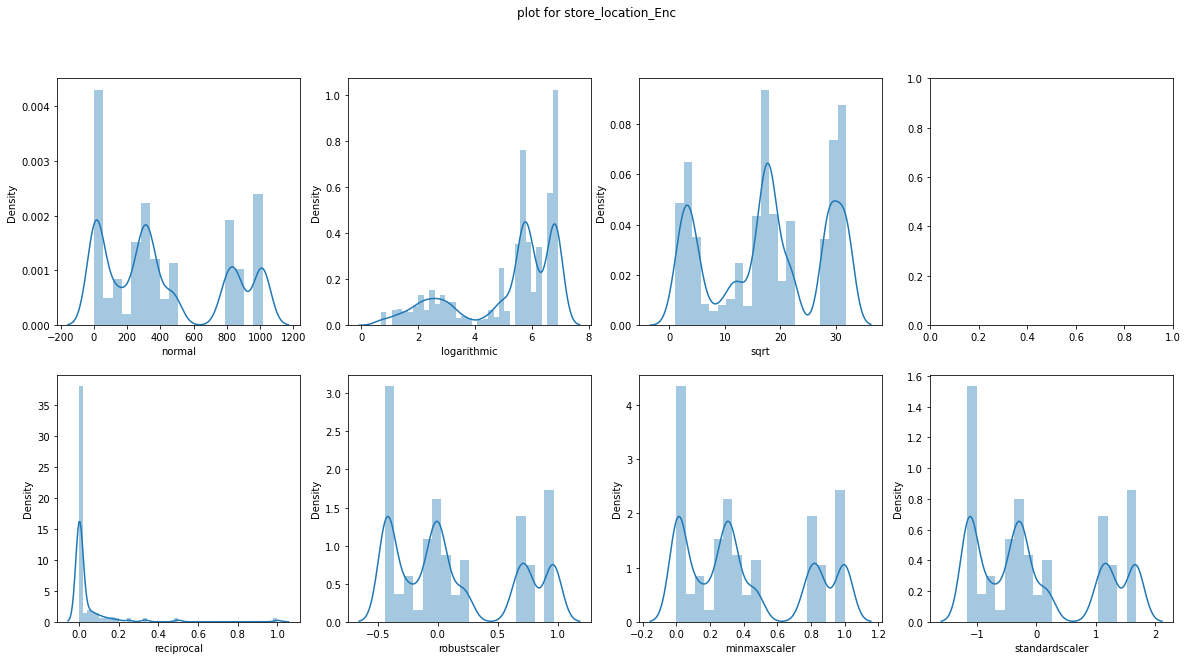

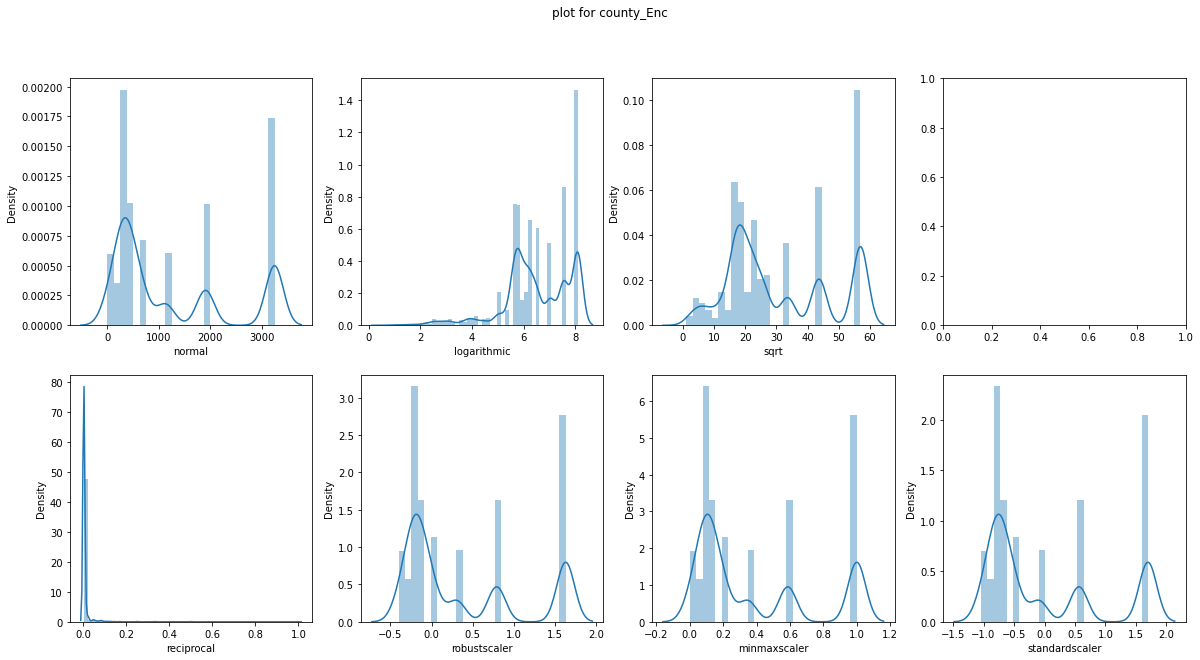

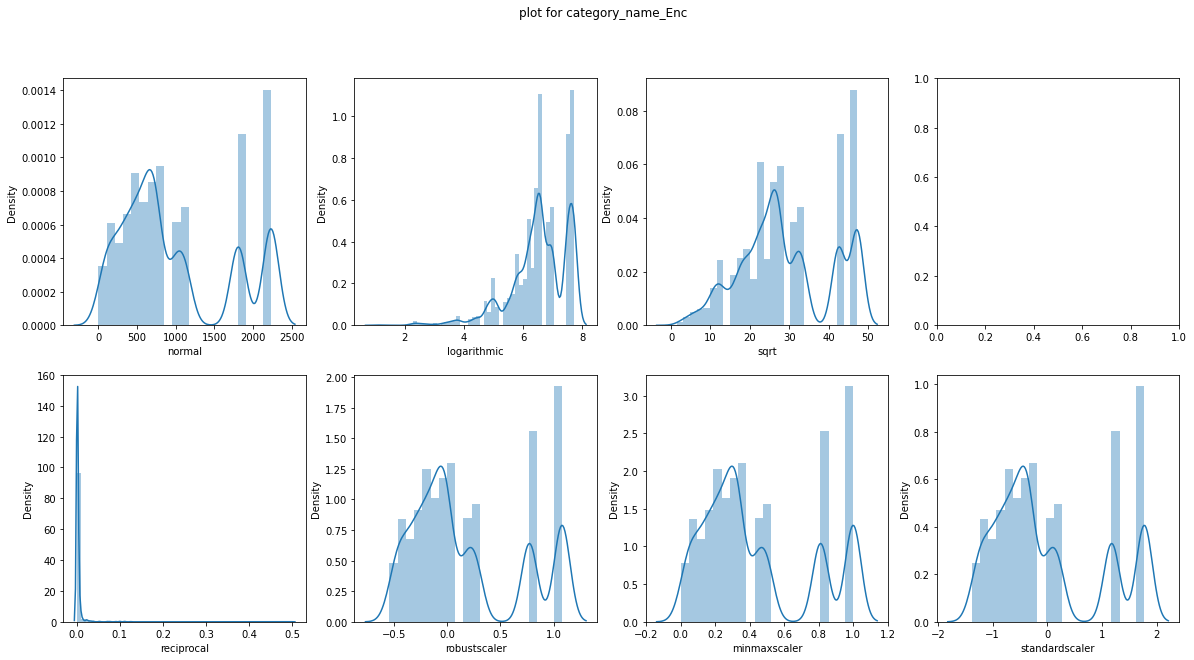

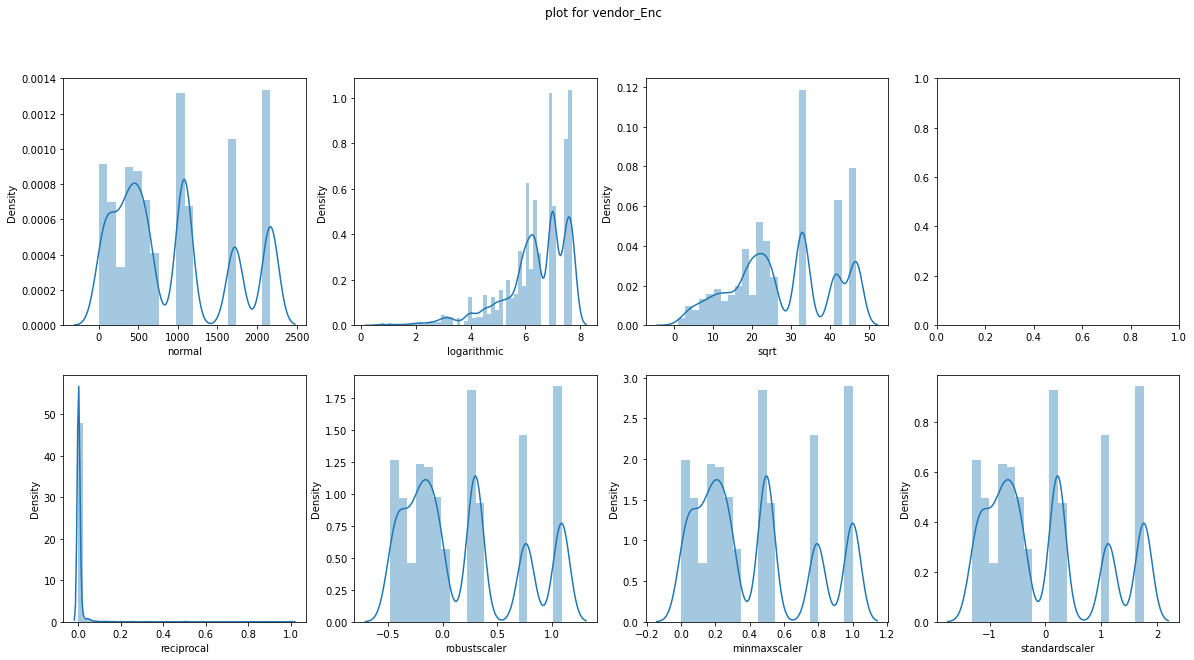

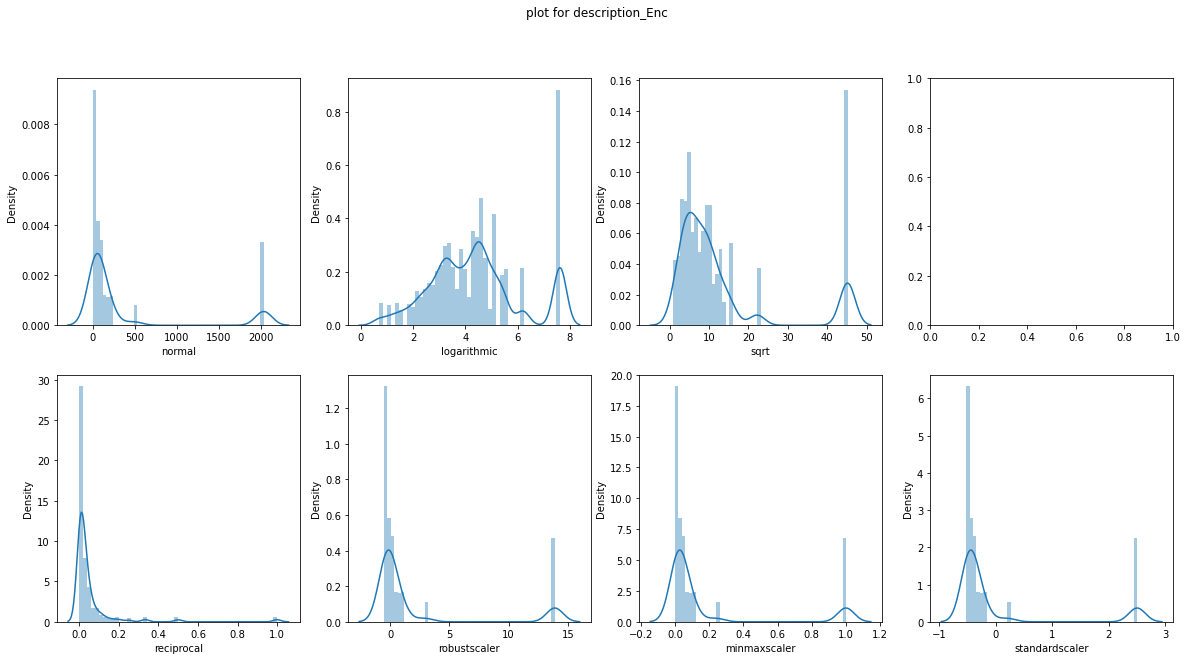

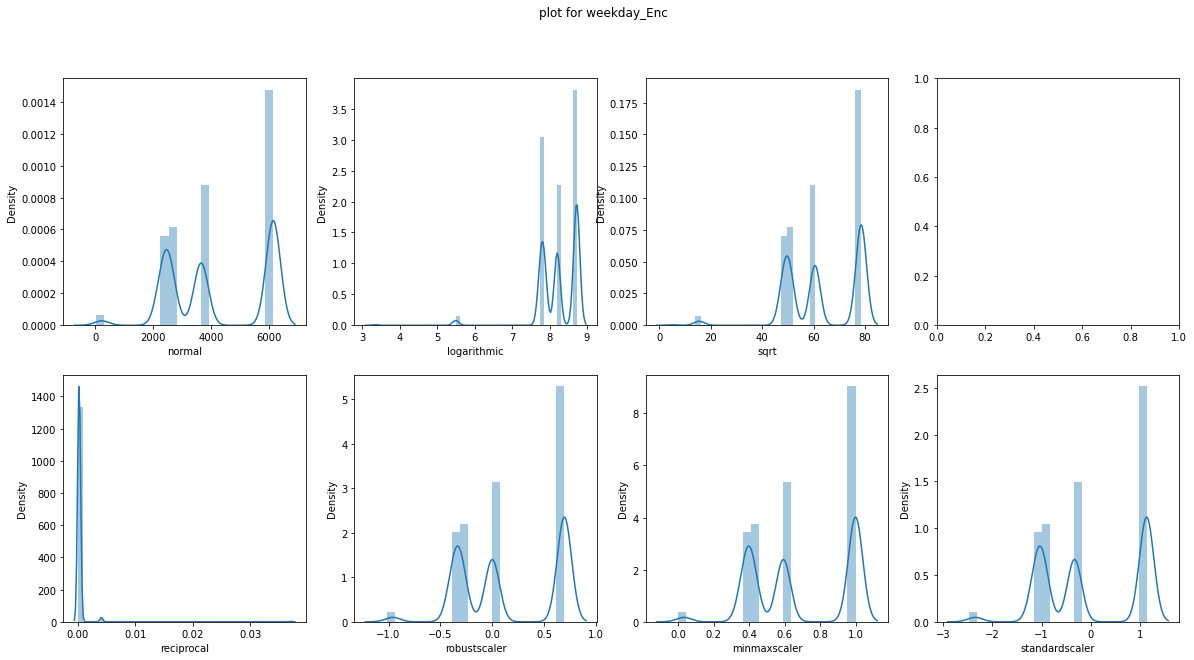

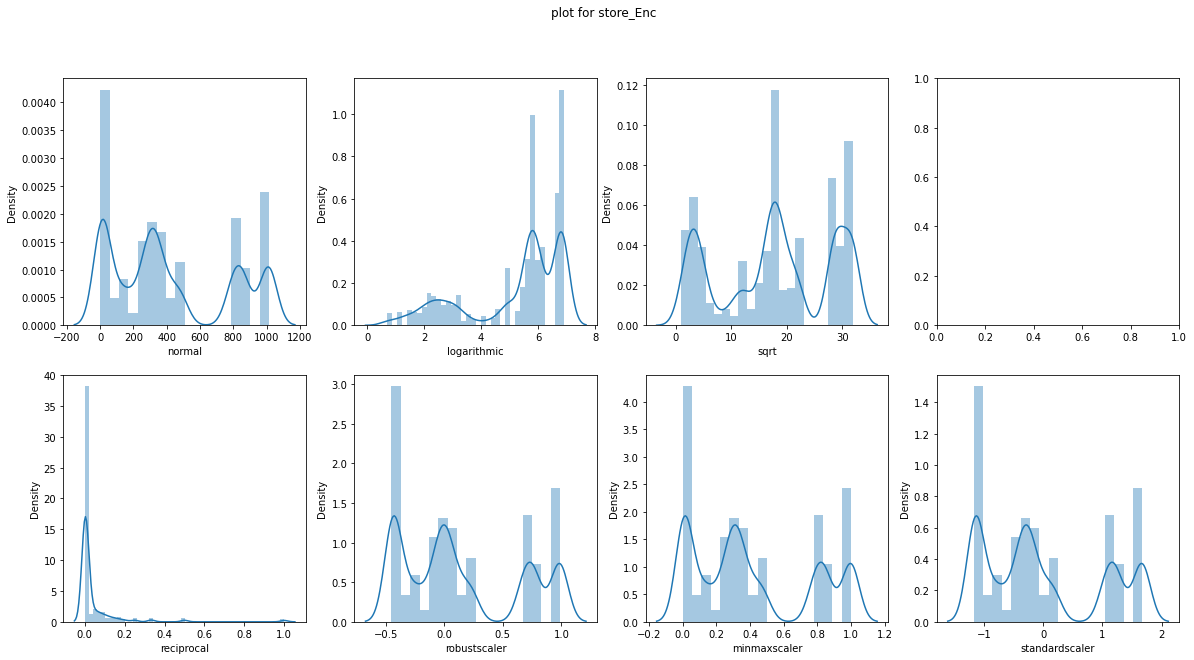

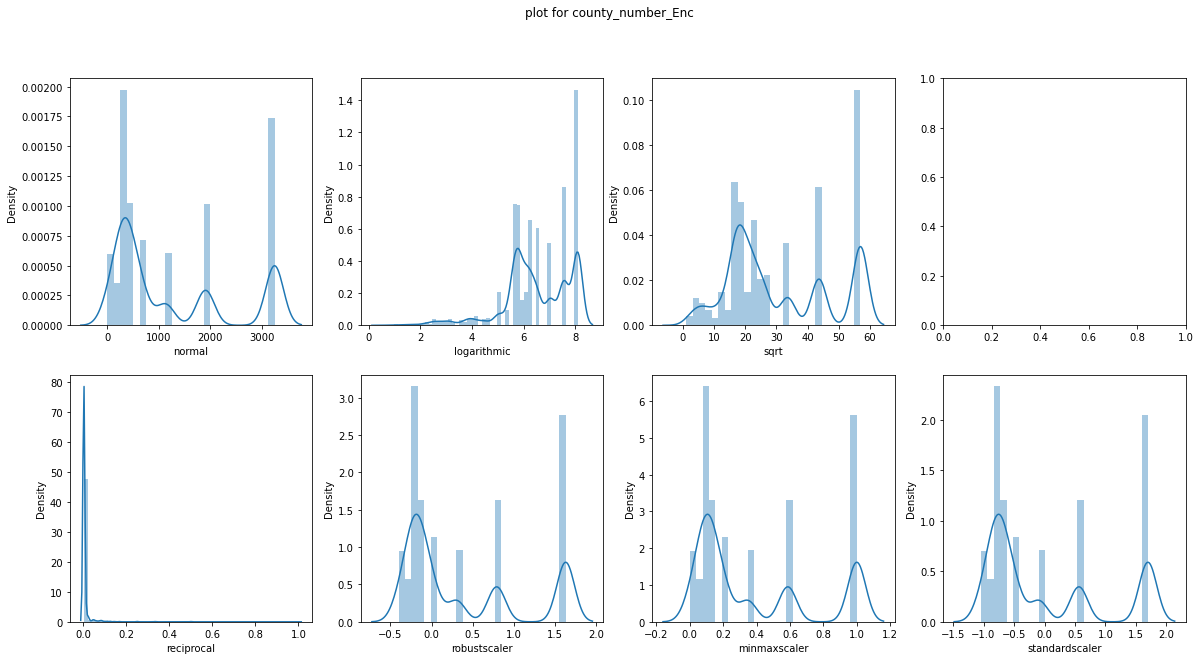

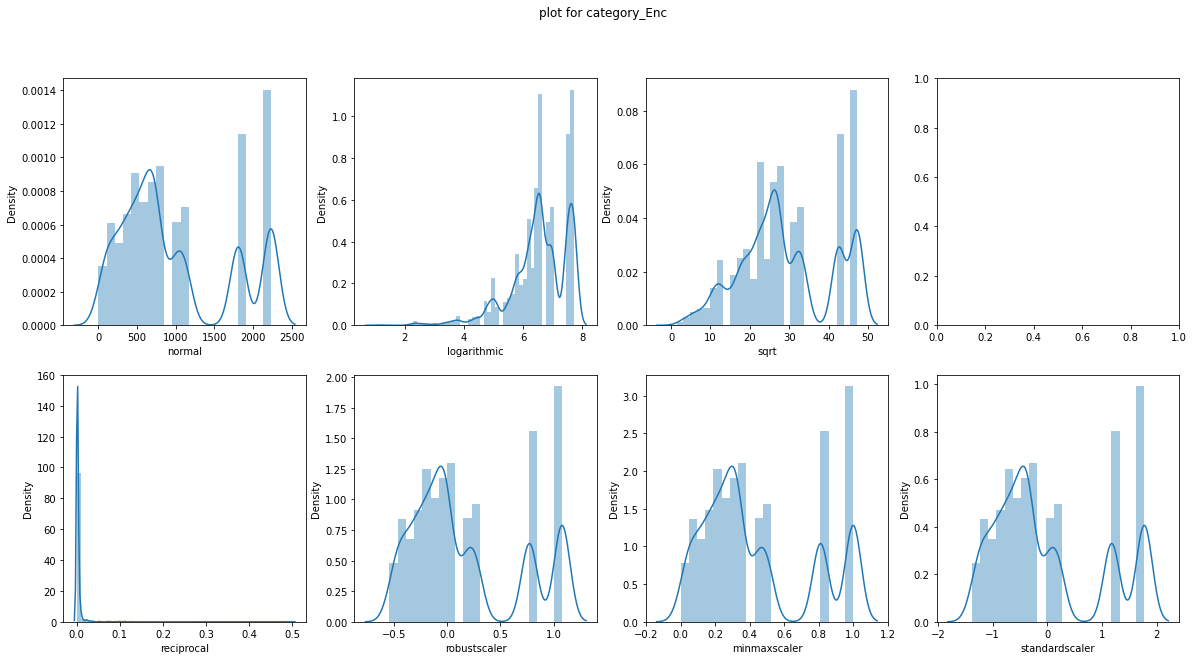

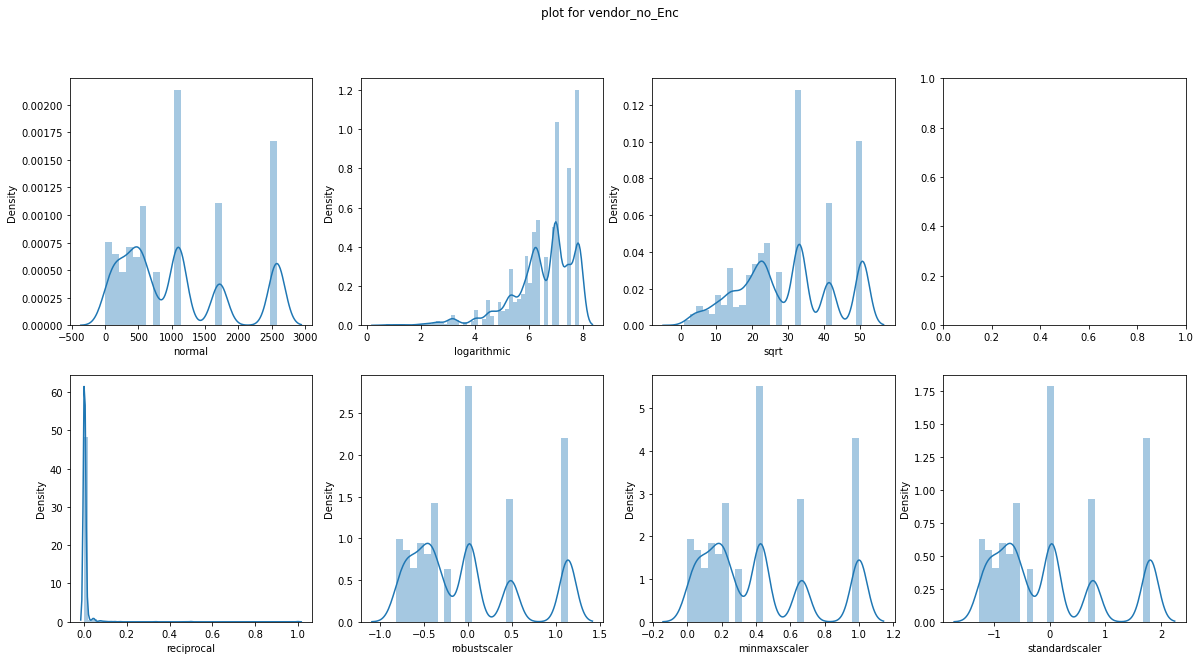

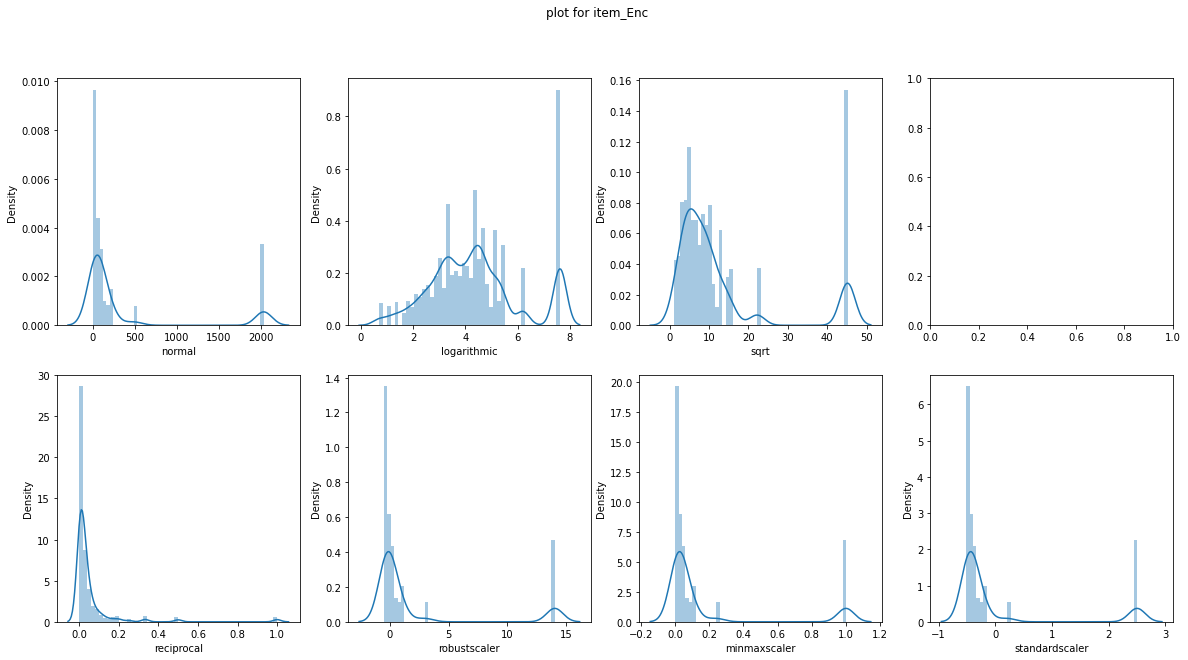

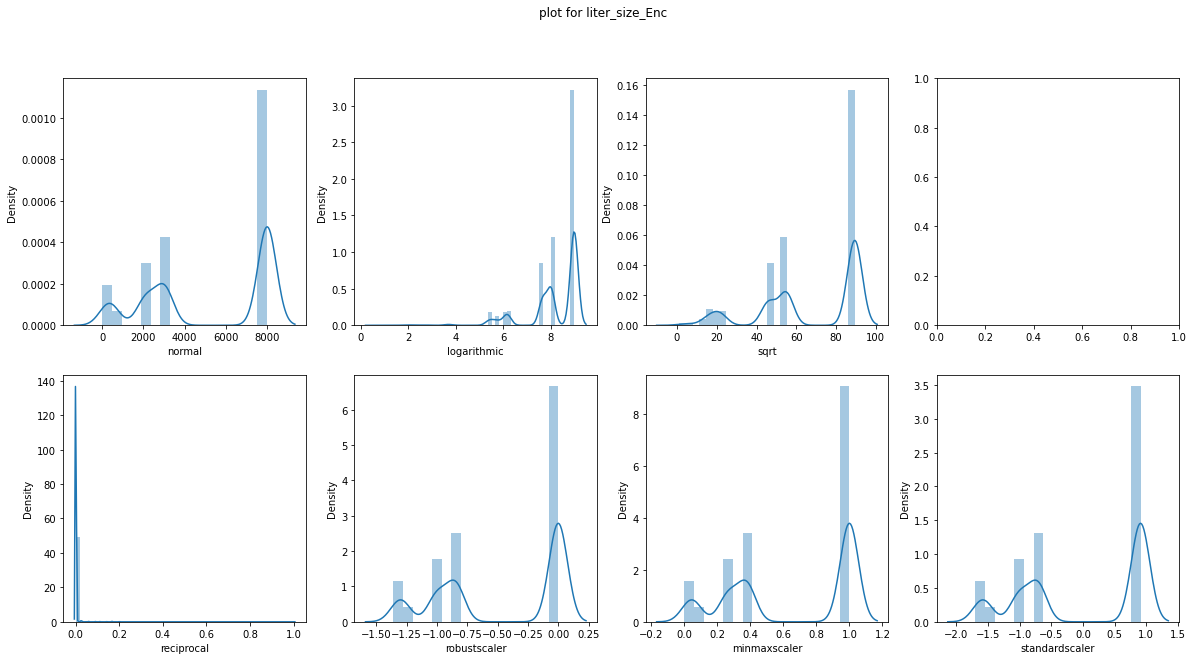

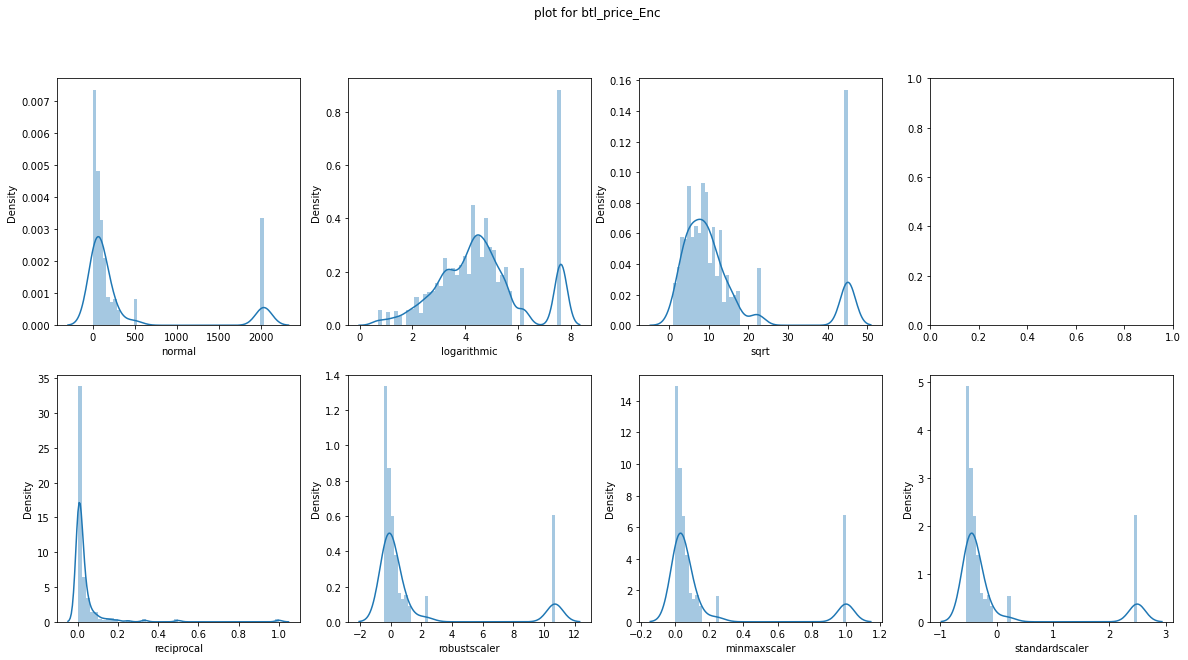

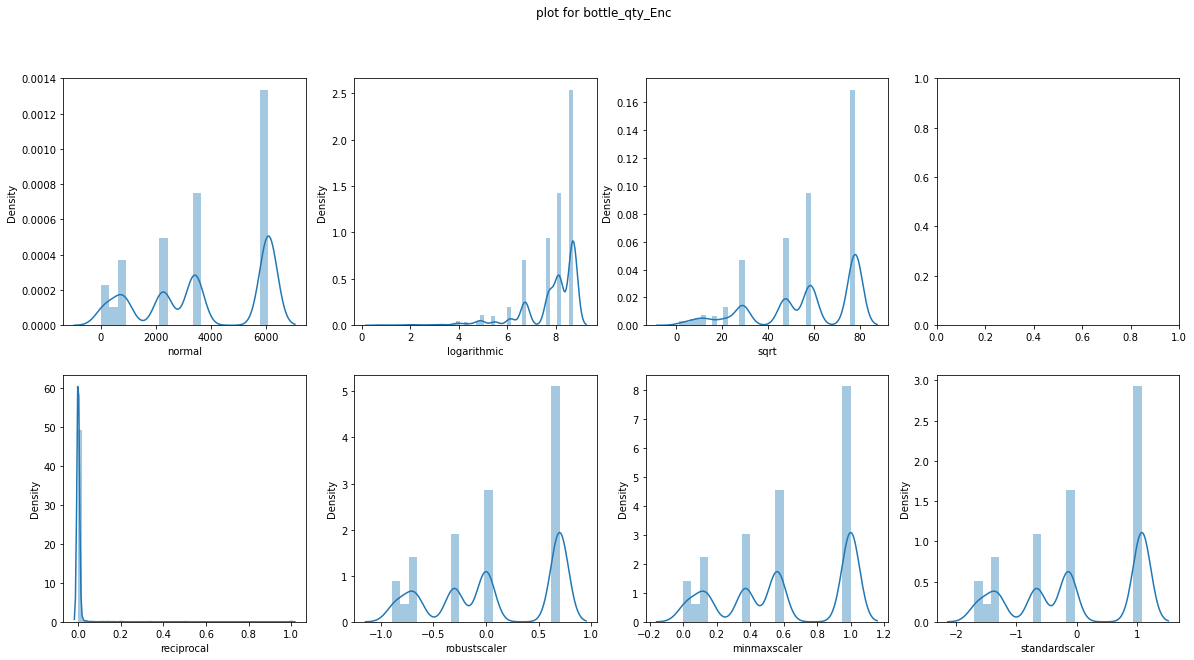

In [58]:
for column in data.columns[1:]:
    plot_curve(data,column)

In [59]:
data.columns

Index(['total', 'day', 'month', 'year', 'name_Enc', 'address_Enc', 'city_Enc',
       'zipcode_Enc', 'store_location_Enc', 'county_Enc', 'category_name_Enc',
       'vendor_Enc', 'description_Enc', 'weekday_Enc', 'store_Enc',
       'county_number_Enc', 'category_Enc', 'vendor_no_Enc', 'item_Enc',
       'liter_size_Enc', 'btl_price_Enc', 'bottle_qty_Enc'],
      dtype='object')

In [60]:
data2.columns

Index(['total', 'name_Enc', 'address_Enc', 'city_Enc', 'zipcode_Enc',
       'store_location_Enc', 'county_Enc', 'category_name_Enc', 'vendor_Enc',
       'description_Enc', 'weekday_Enc', 'store_Enc', 'county_number_Enc',
       'category_Enc', 'vendor_no_Enc', 'item_Enc', 'liter_size_Enc',
       'btl_price_Enc', 'bottle_qty_Enc', 'day_Enc', 'month_Enc', 'year_Enc'],
      dtype='object')

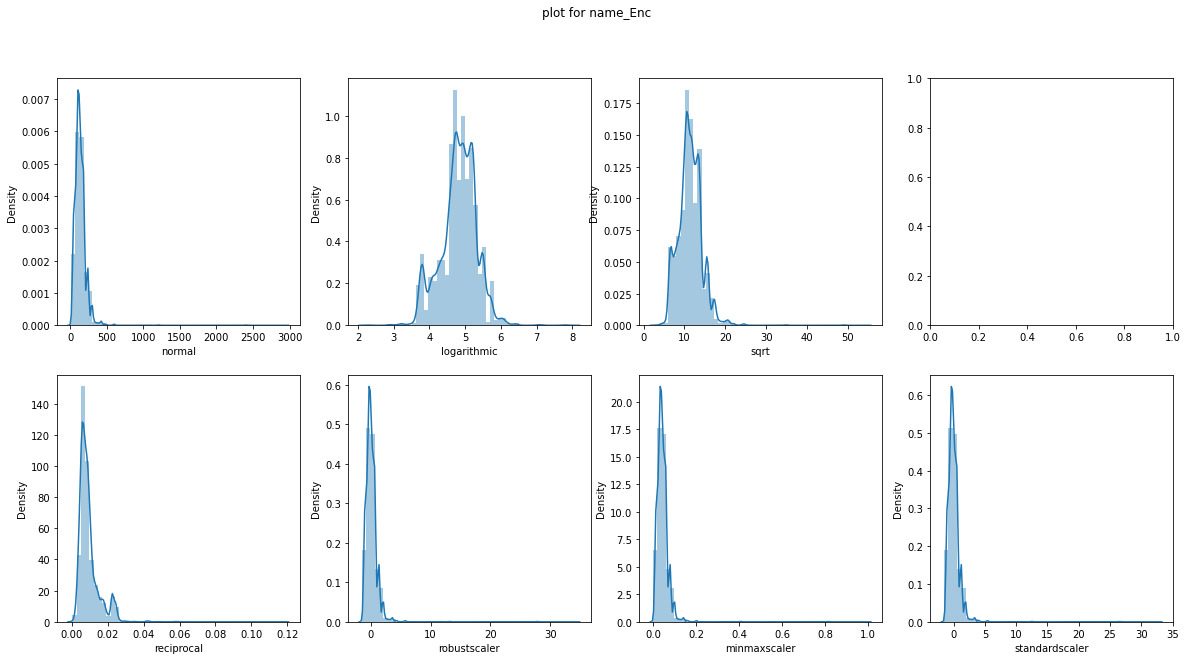

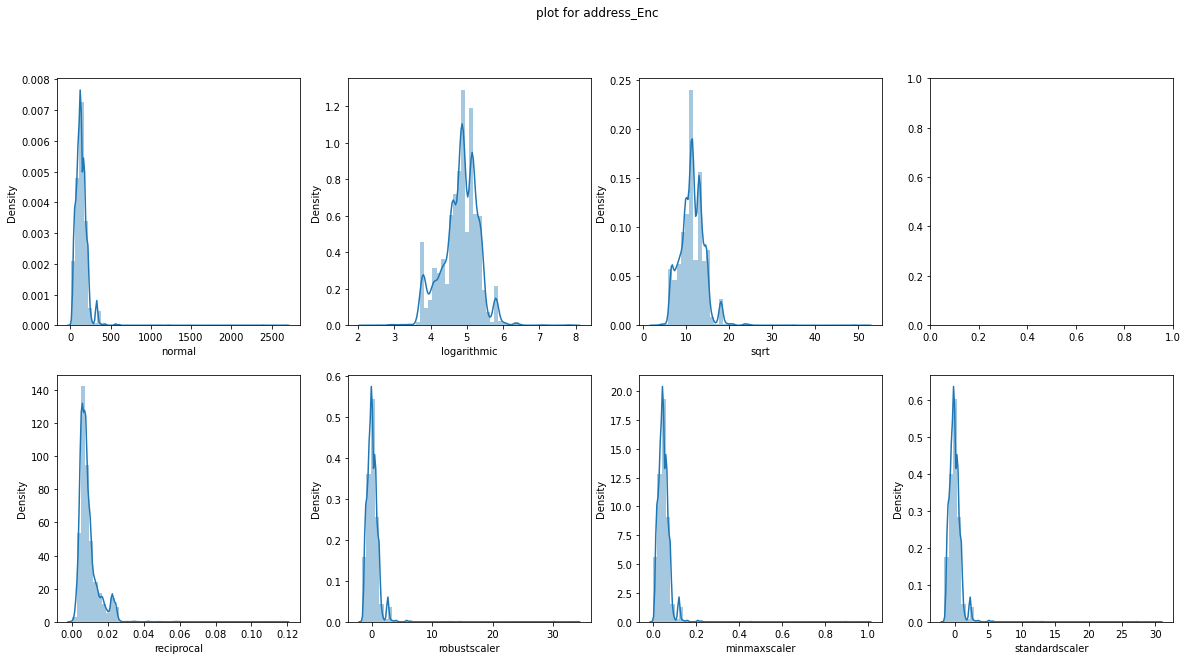

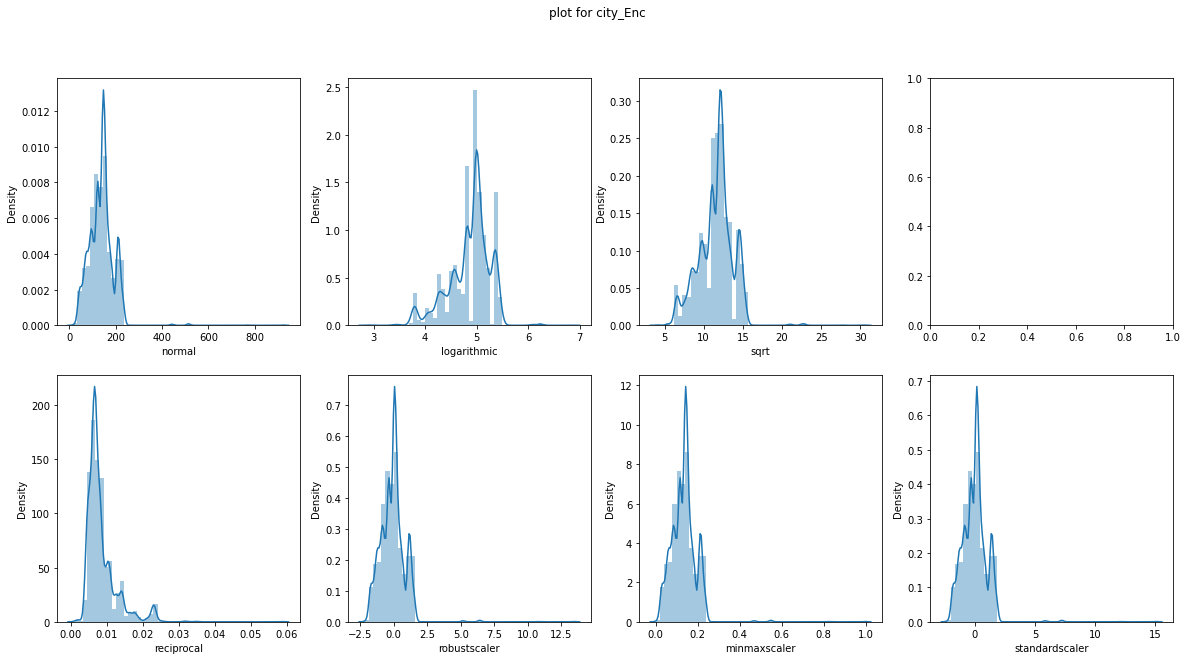

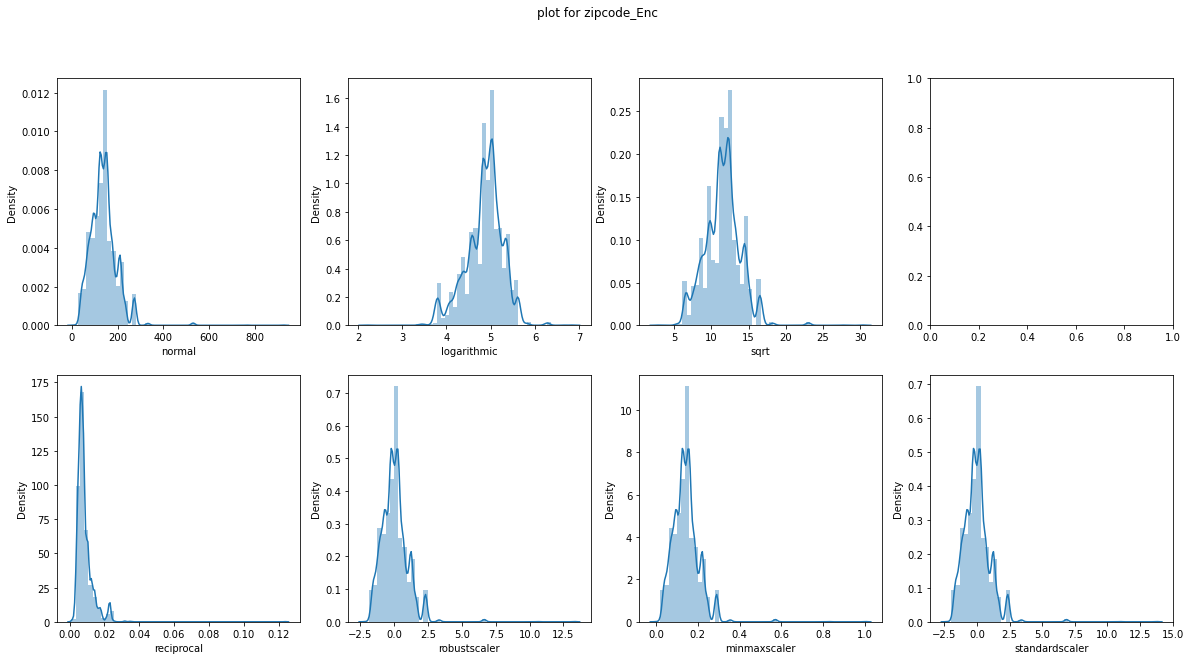

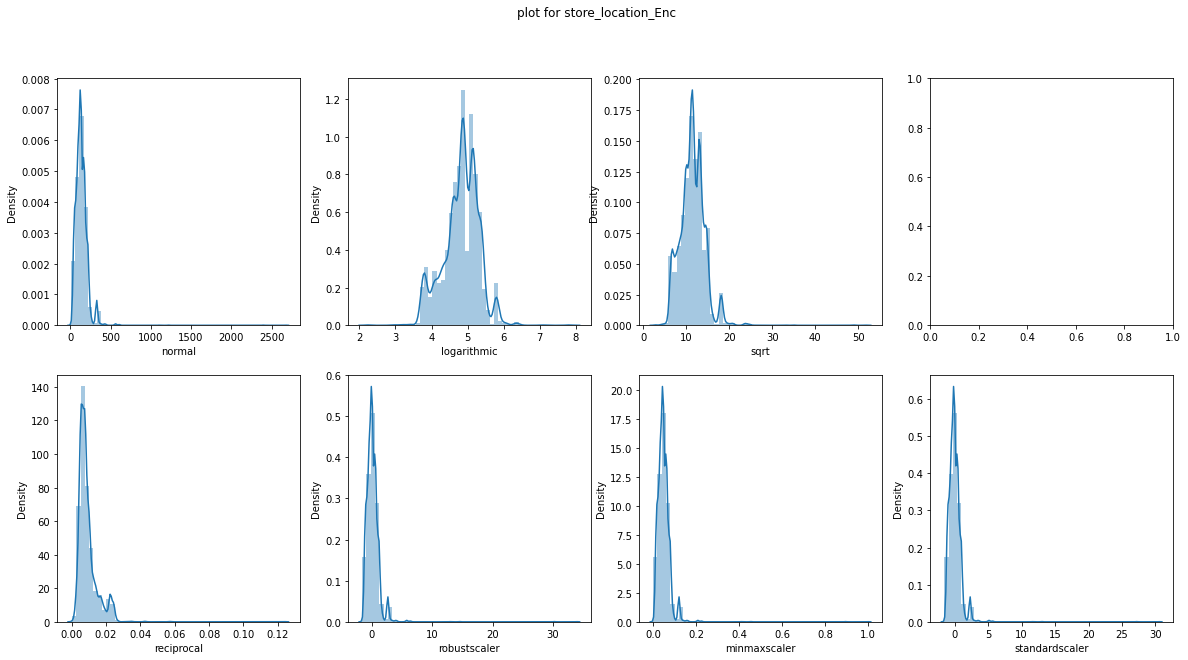

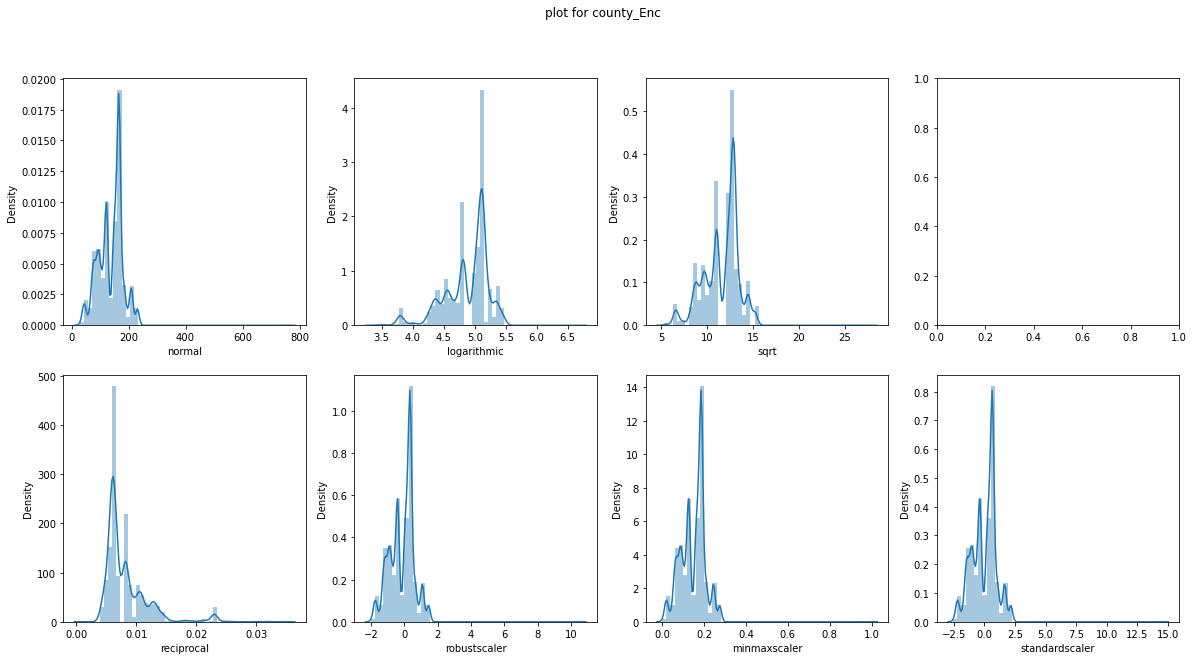

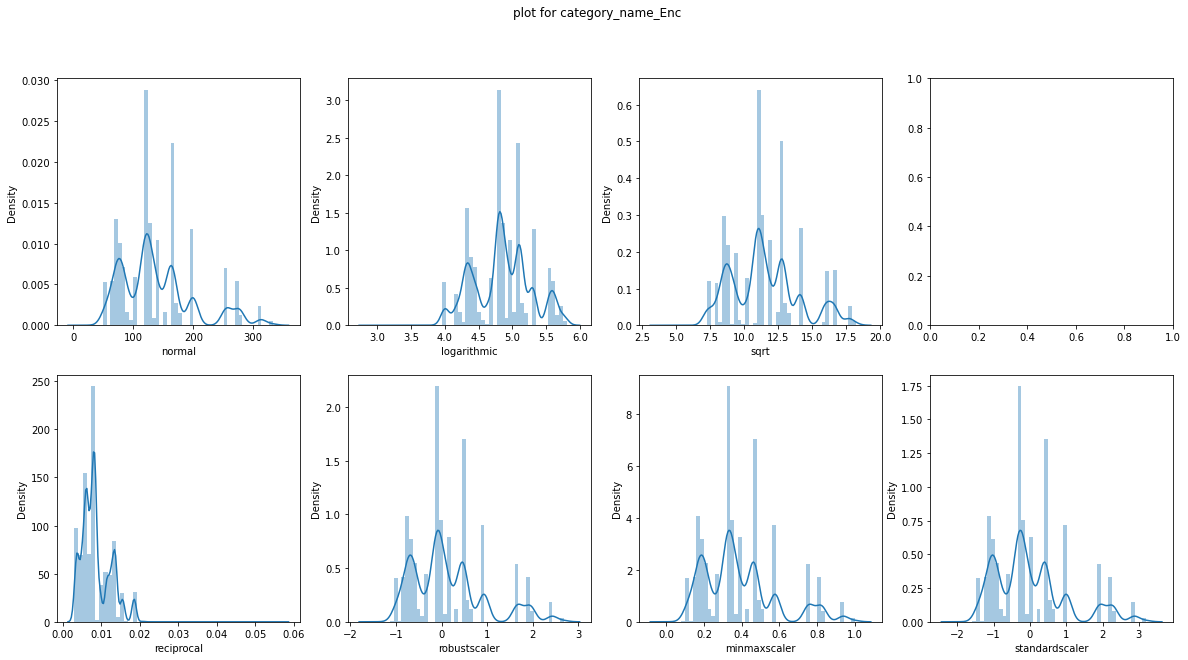

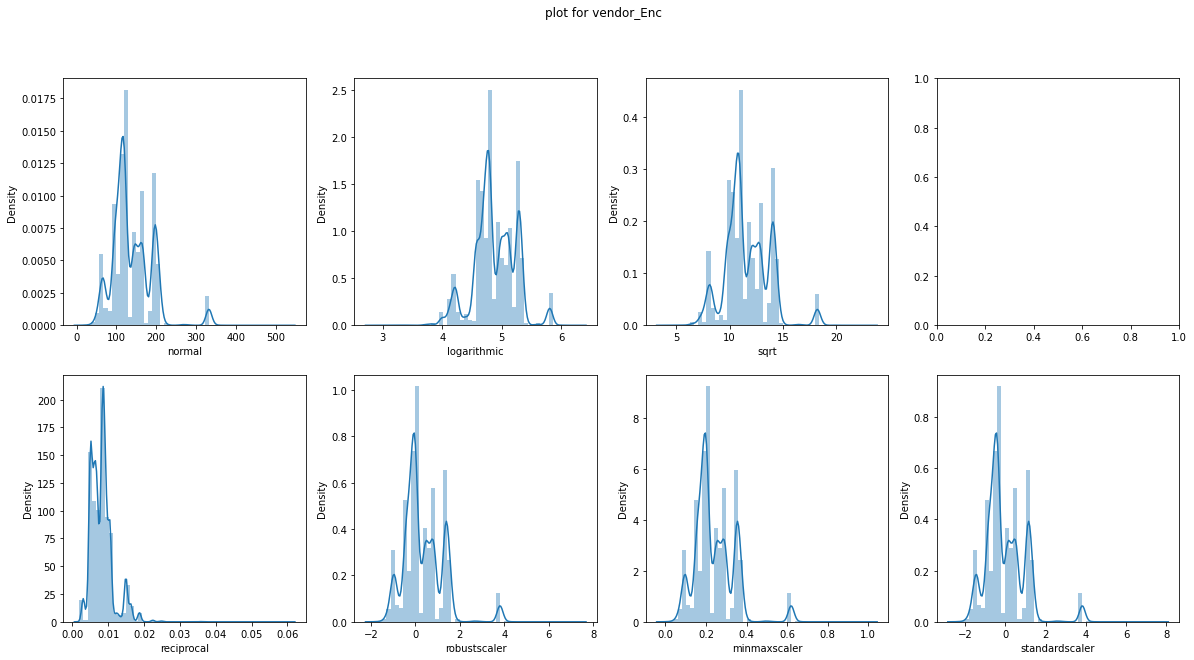

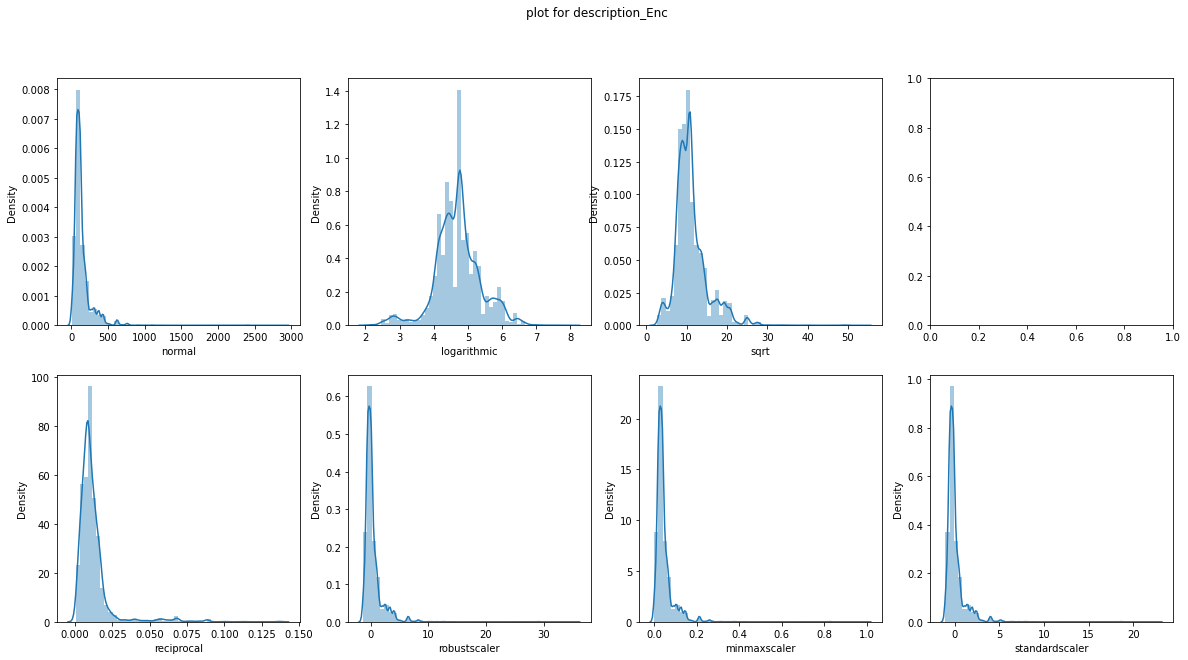

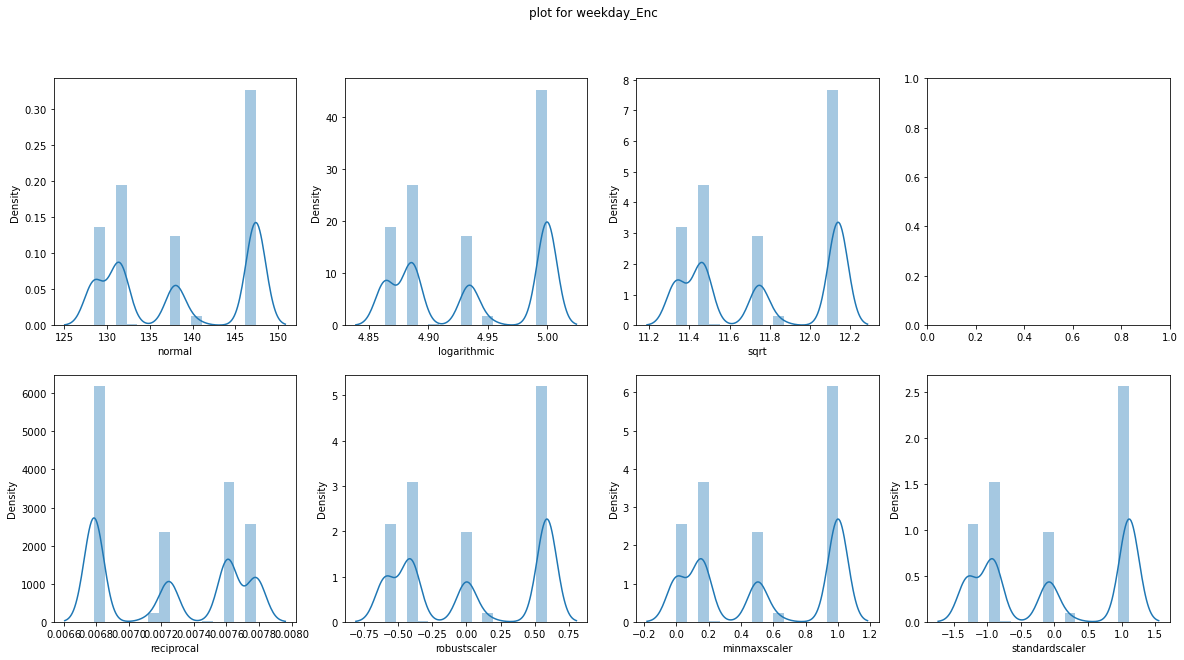

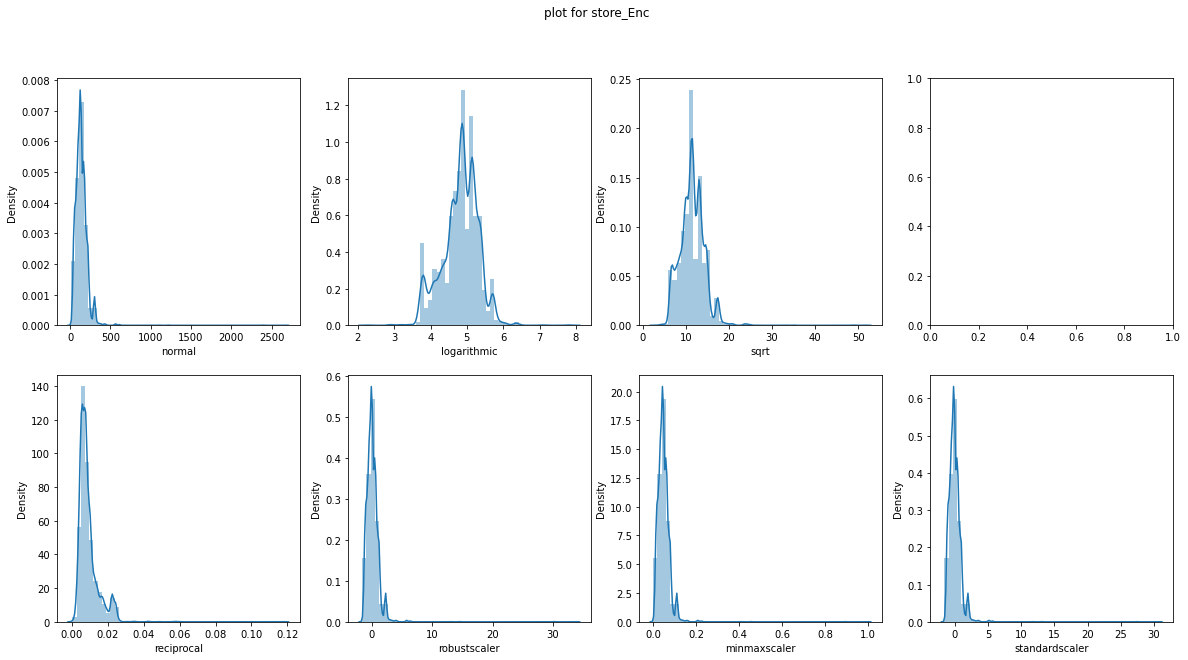

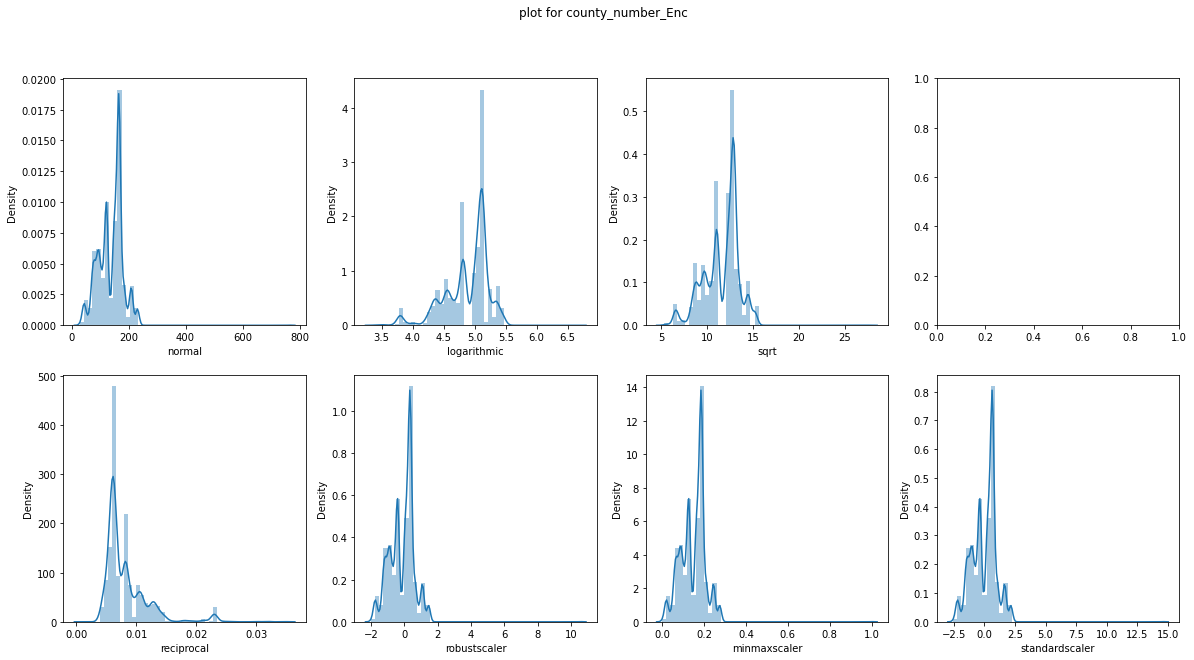

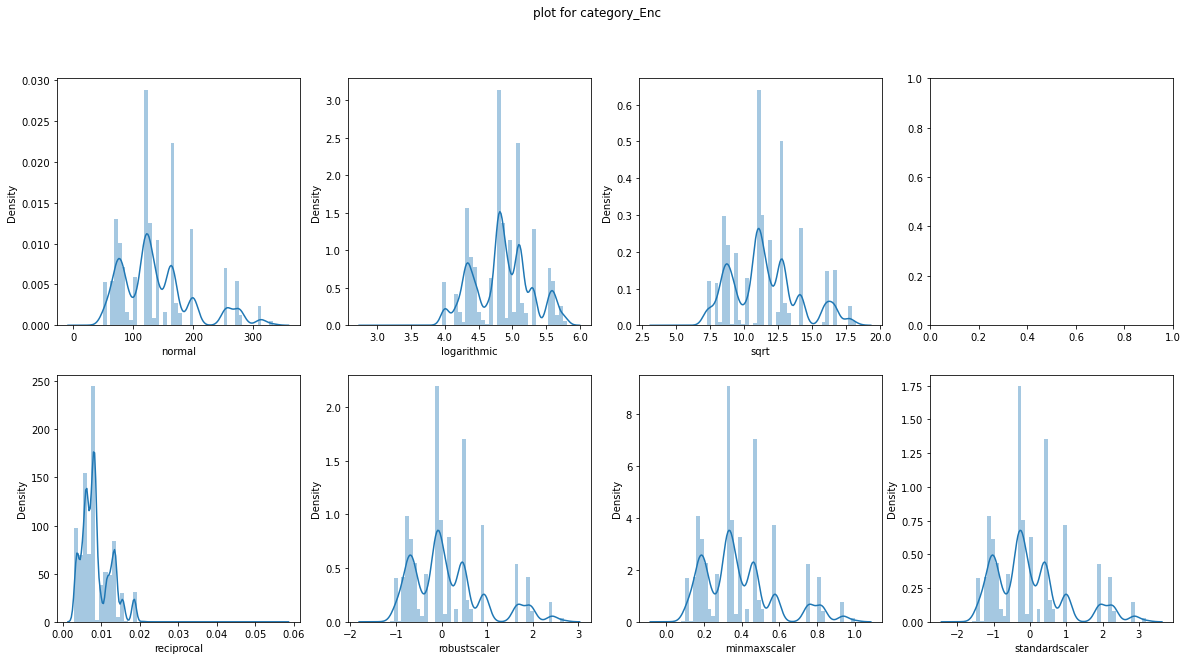

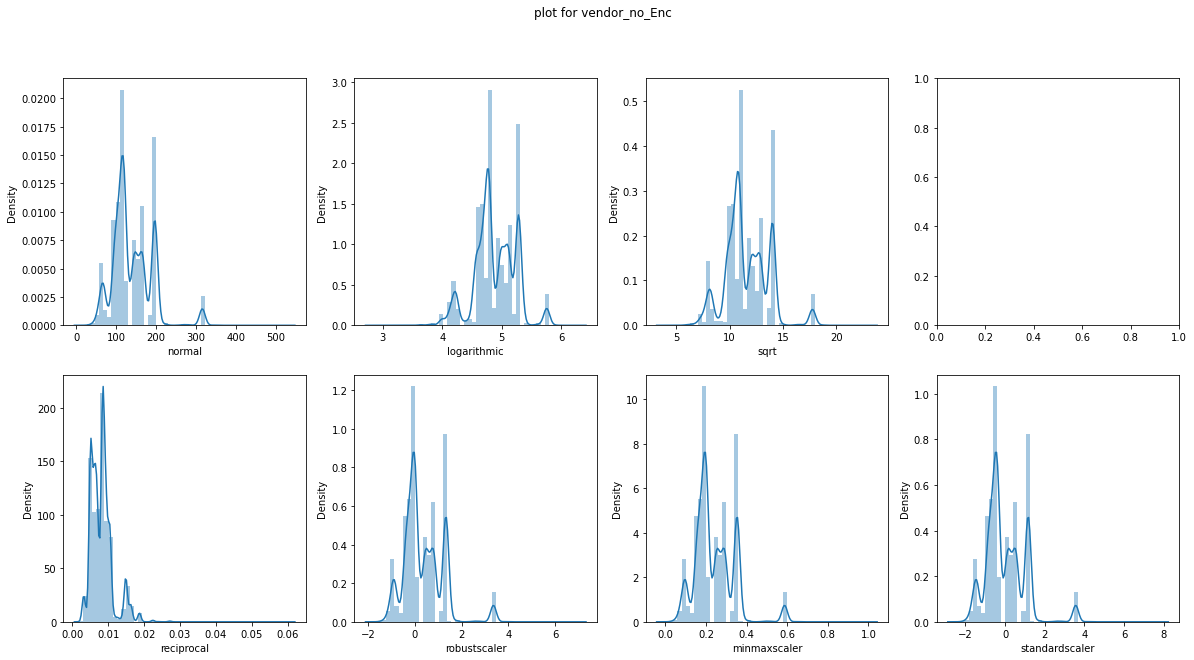

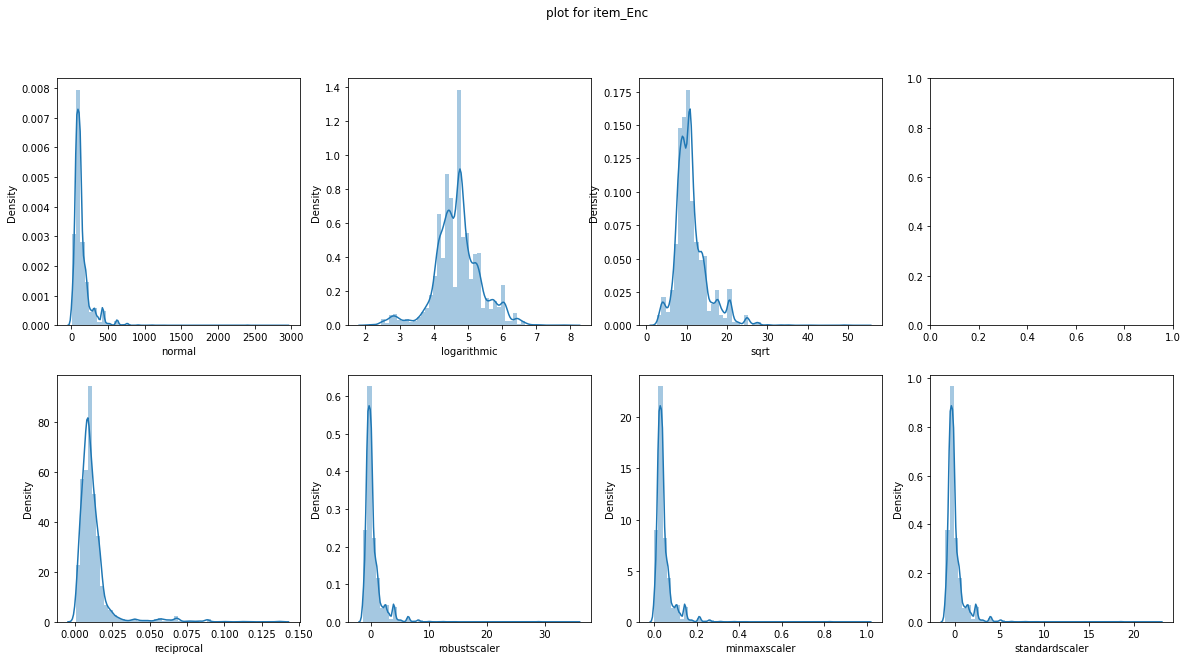

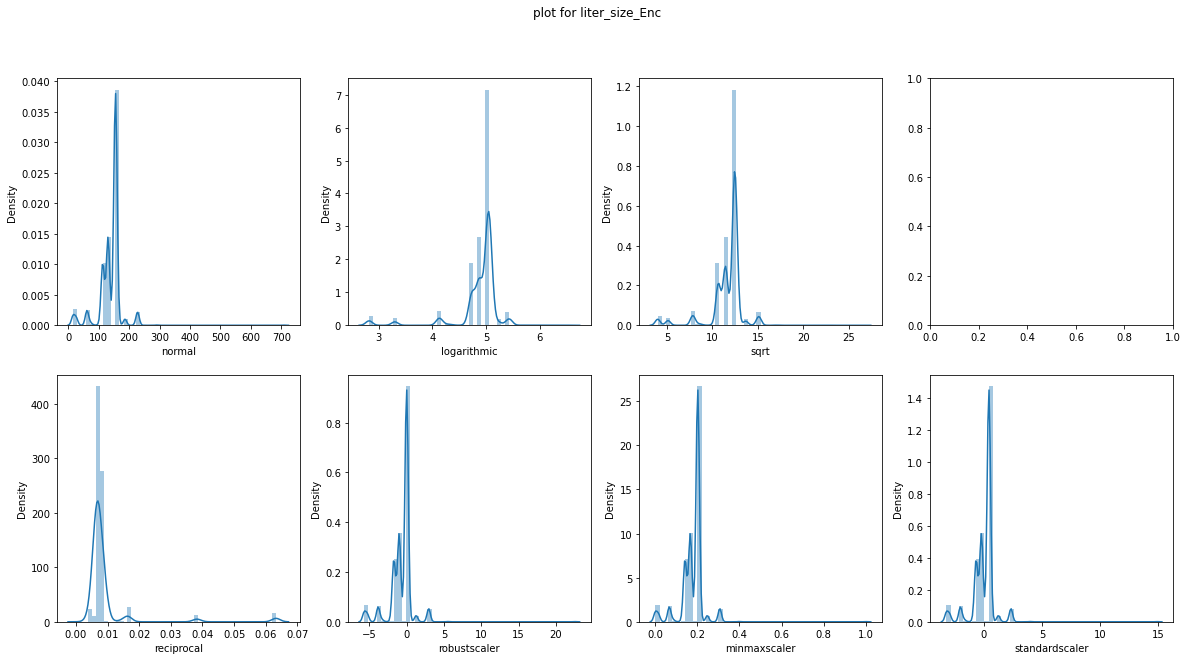

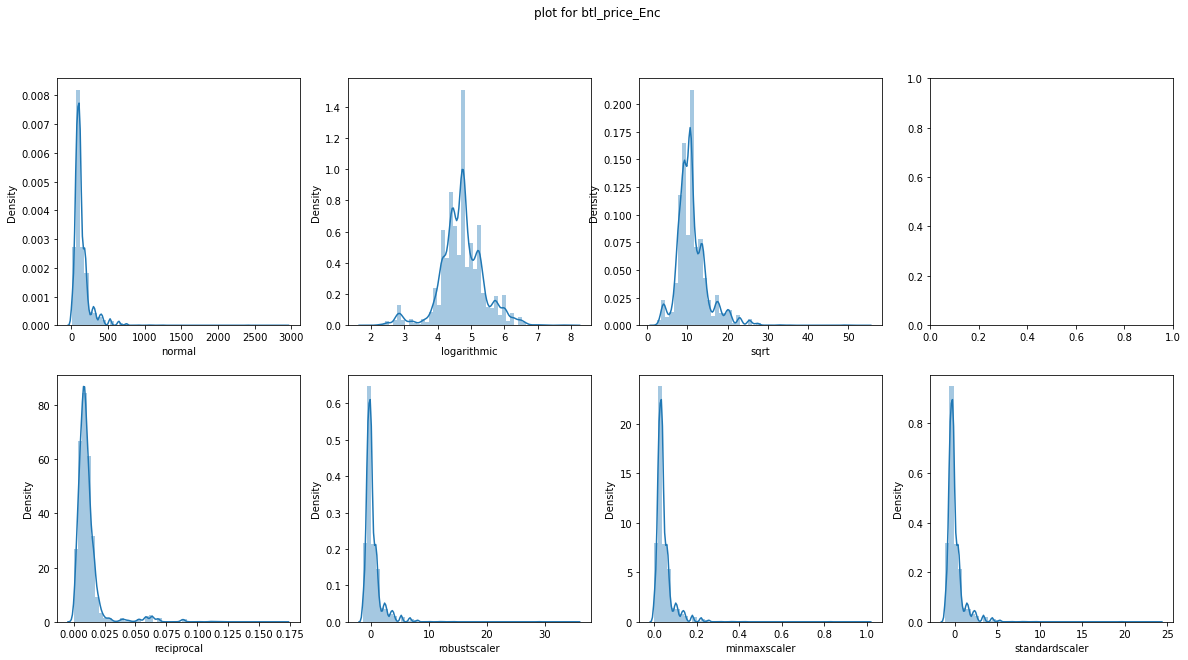

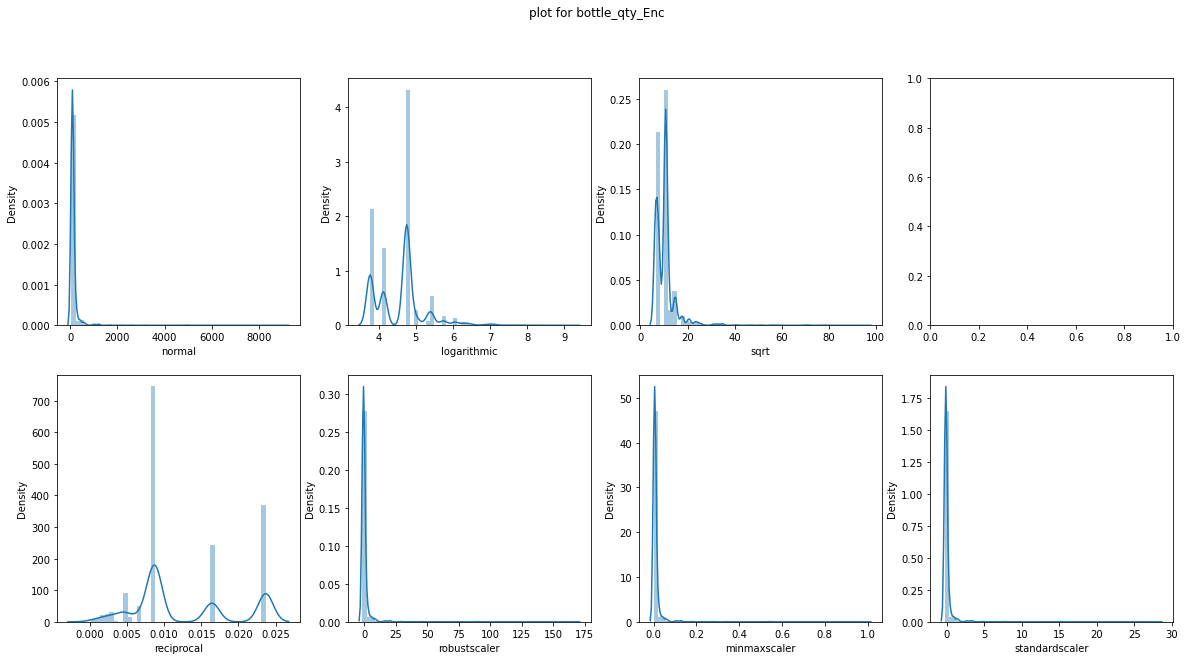

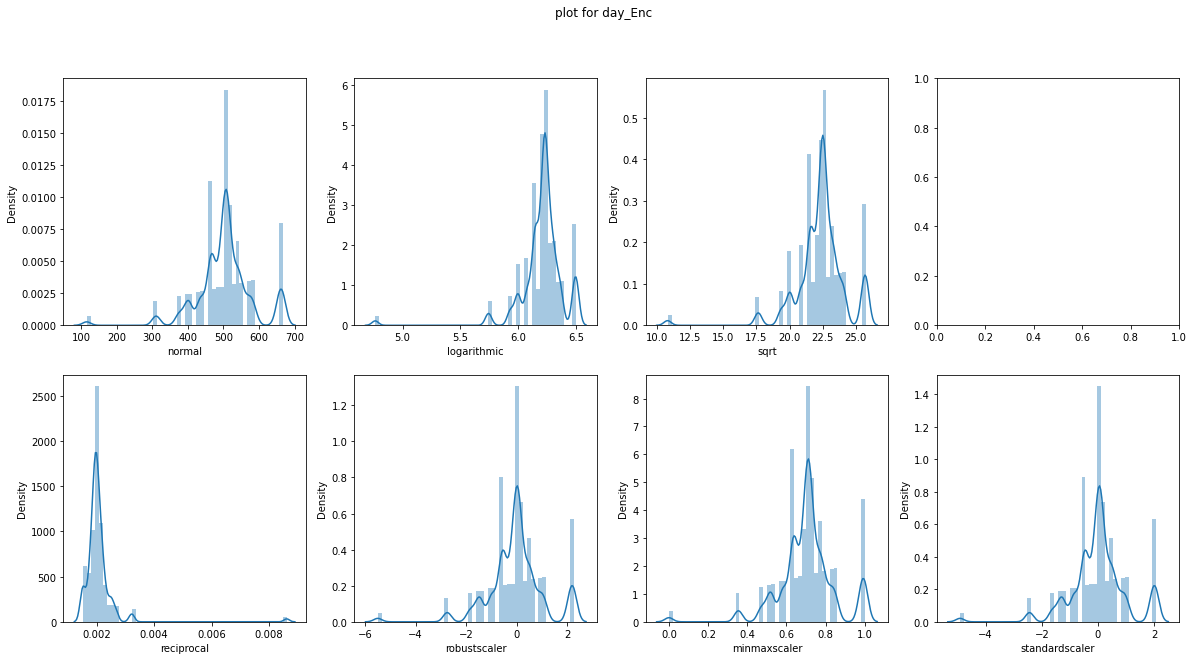

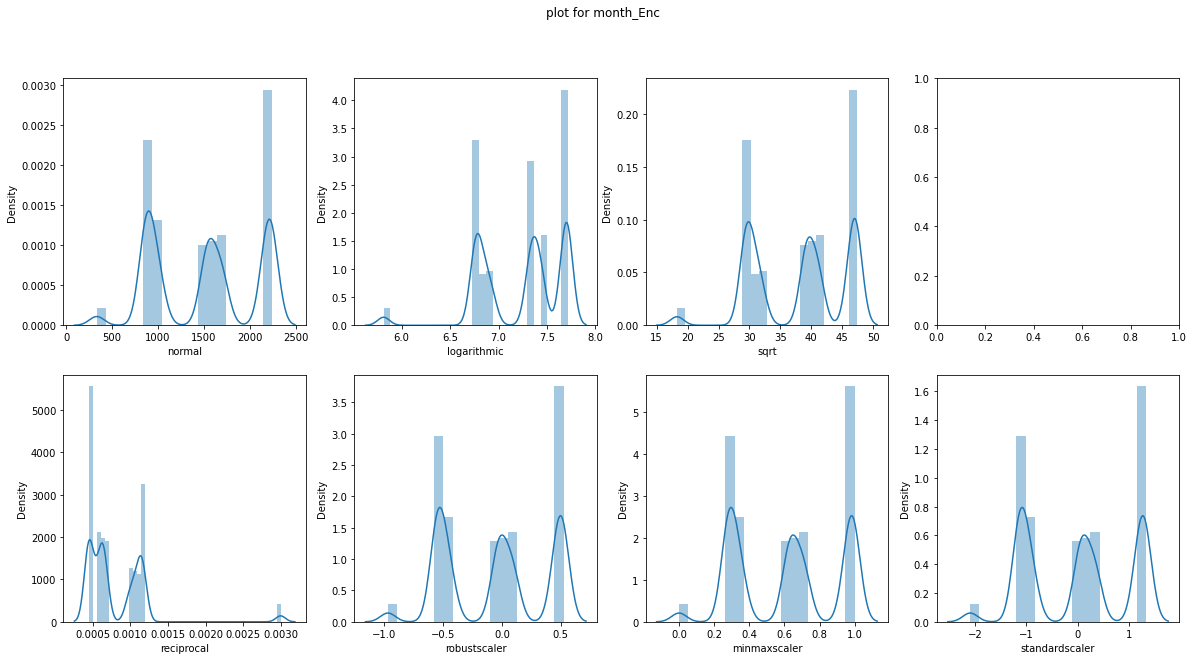

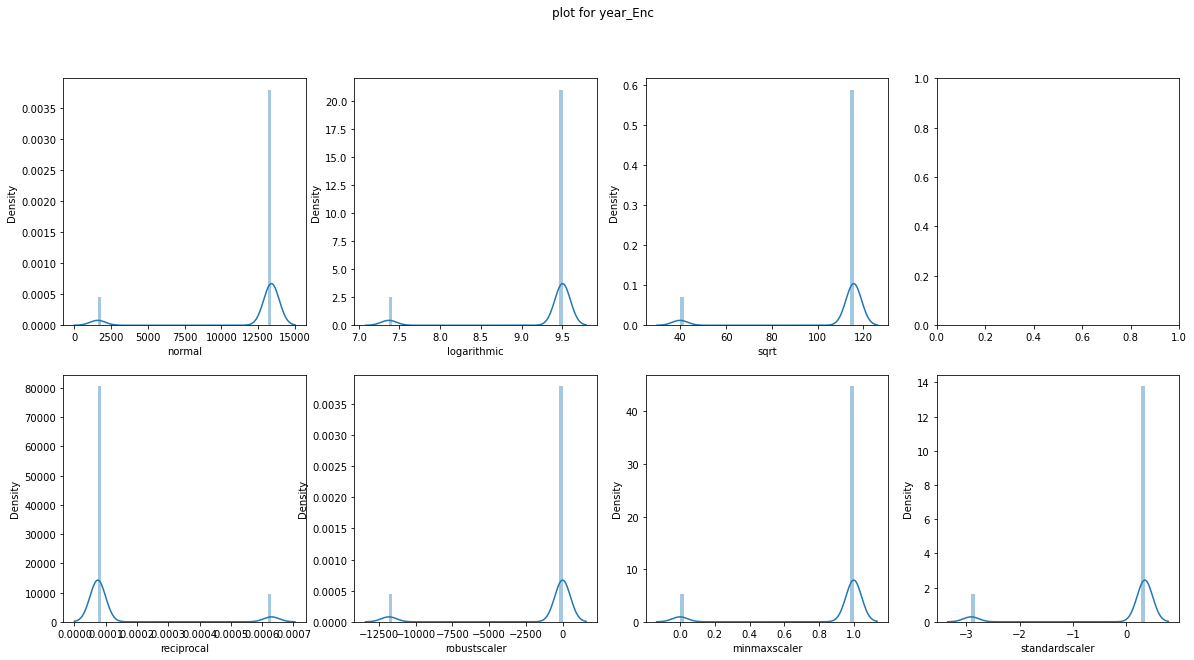

In [61]:
for column in data2.columns[1:]:
    plot_curve(data2,column)

<AxesSubplot:xlabel='total', ylabel='Density'>

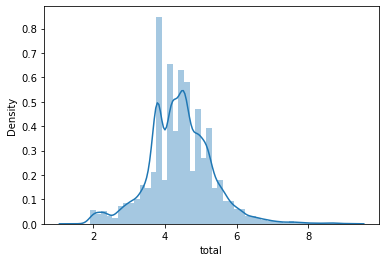

In [62]:
sns.distplot(np.log(data['total']))

<AxesSubplot:>

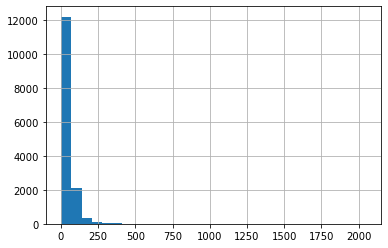

In [63]:
(data['total']**(1/1.2)).hist(bins=30)

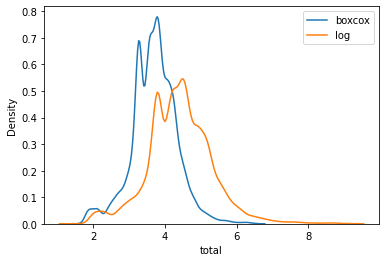

In [64]:
import scipy.stats as stat
sns.distplot(stat.boxcox(data['total'])[0],label='boxcox',hist=False)
sns.distplot(np.log(data['total']),label='log',hist=False)
plt.legend()

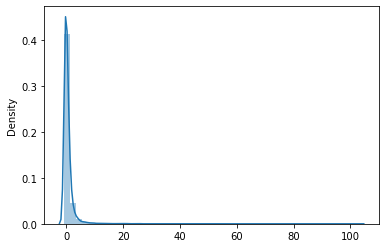

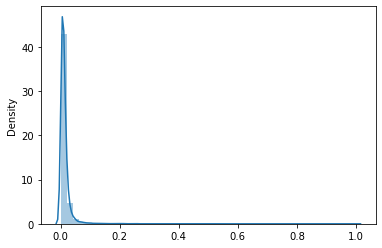

<AxesSubplot:ylabel='Density'>

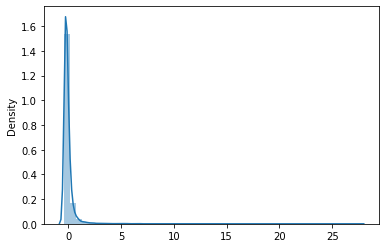

In [65]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
robust=RobustScaler()
minmax=MinMaxScaler()
standard=StandardScaler()
a=minmax.fit_transform(data[['total']])
sns.distplot(robust.fit_transform(data[['total']]))
plt.show()
sns.distplot(minmax.fit_transform(data[['total']]))
plt.show()
sns.distplot(standard.fit_transform(data[['total']]))

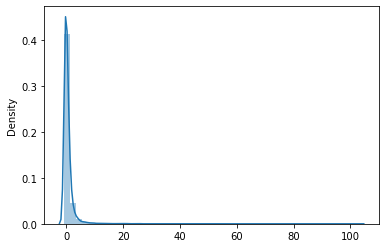

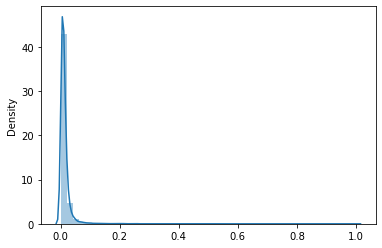

<AxesSubplot:ylabel='Density'>

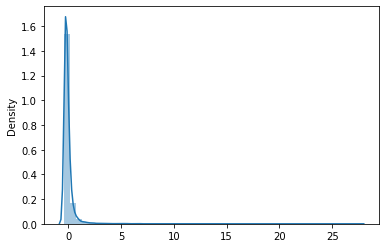

In [66]:
sns.distplot(robust.fit_transform(data2[['total']]))
plt.show()
sns.distplot(minmax.fit_transform(data2[['total']]))
plt.show()
sns.distplot(standard.fit_transform(data2[['total']]))

### We can see that bottle quantity and bottle price are highly correlated

<AxesSubplot:xlabel='total', ylabel='Count'>

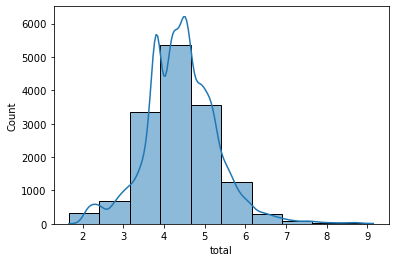

In [67]:
sns.histplot(np.log1p(data['total']),bins=10,kde=True)

<AxesSubplot:xlabel='total', ylabel='Density'>

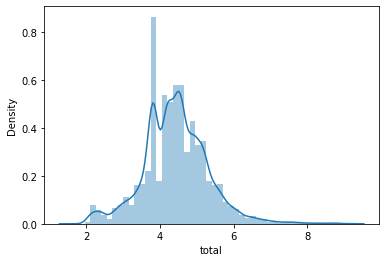

In [68]:
sns.distplot(np.log1p(data['total']))

<AxesSubplot:ylabel='total'>

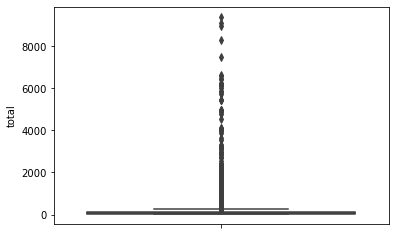

In [69]:
sns.boxplot(data=data,y='total')

In [70]:
# X=data.drop('total',axis=1)
# y=pd.DataFrame((data['total']),columns=['total'])

In [71]:
X=data2.drop('total',axis=1)
y=pd.DataFrame((data2['total']),columns=['total'])

In [72]:
# X_scaled=pd.DataFrame(standard.fit_transform(X),columns=X.columns)

<AxesSubplot:>

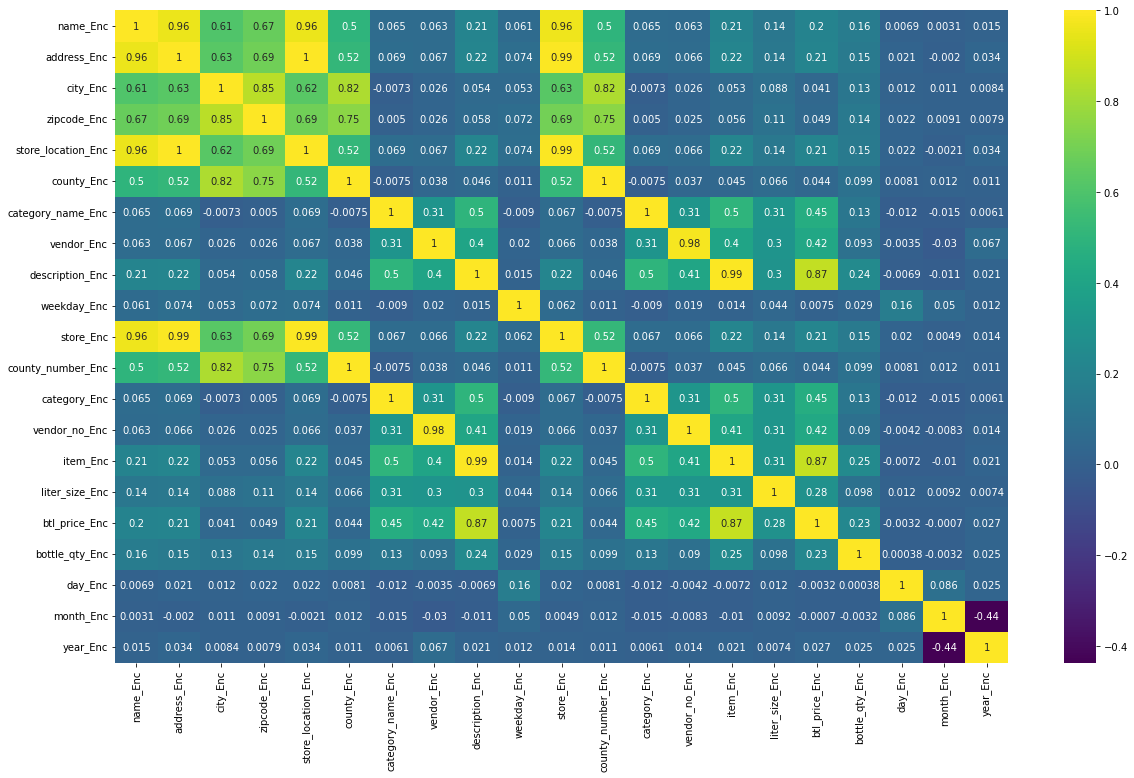

In [73]:
plt.figure(figsize=(20,12))
sns.heatmap(X.corr(),annot=True,cmap='viridis')

In [74]:
corr_set

NameError: name 'corr_set' is not defined

In [76]:
abs(round(X[['btl_price_Enc','category_Enc']].corr(),2)>0.7).values[0][1]

False

In [75]:
corr_set=set()
threshold=0.7
for categories in X.columns:
    for i in X.columns:
        if categories!=i:
            if abs(round(X[[categories,i]].corr(),2)>threshold).values[0][1]:
                corr_set.add(categories)

In [77]:
X.drop(corr_set,axis=1,inplace=True)

In [78]:
X.columns

Index(['weekday_Enc', 'liter_size_Enc', 'bottle_qty_Enc', 'day_Enc',
       'month_Enc', 'year_Enc'],
      dtype='object')

<AxesSubplot:>

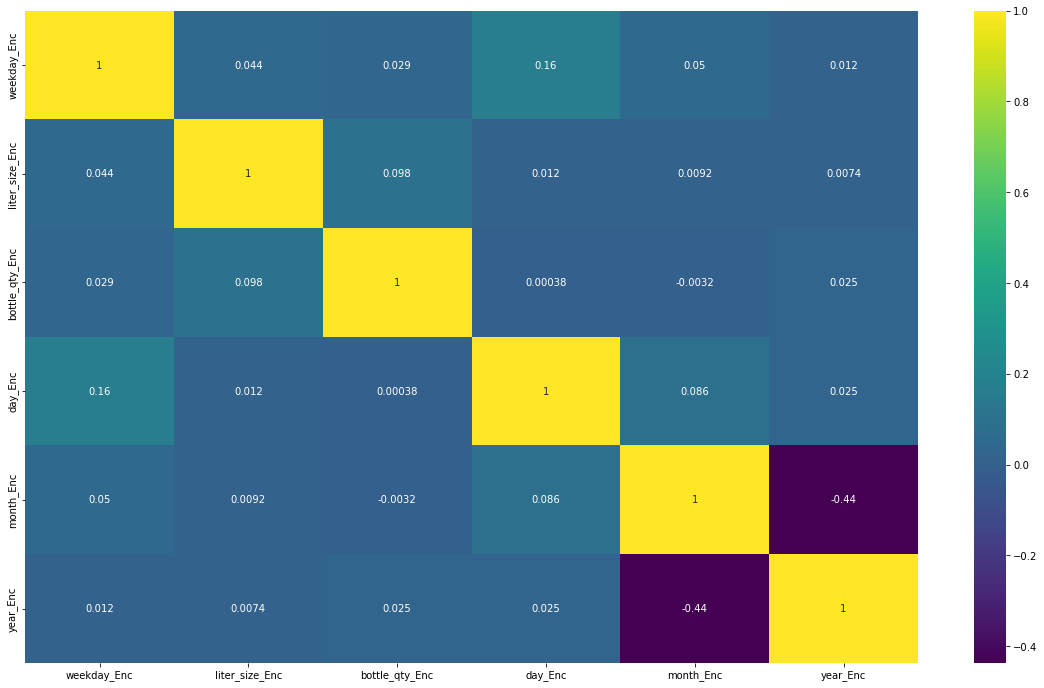

In [79]:
plt.figure(figsize=(20,12))
sns.heatmap(X.corr(),annot=True,cmap='viridis')

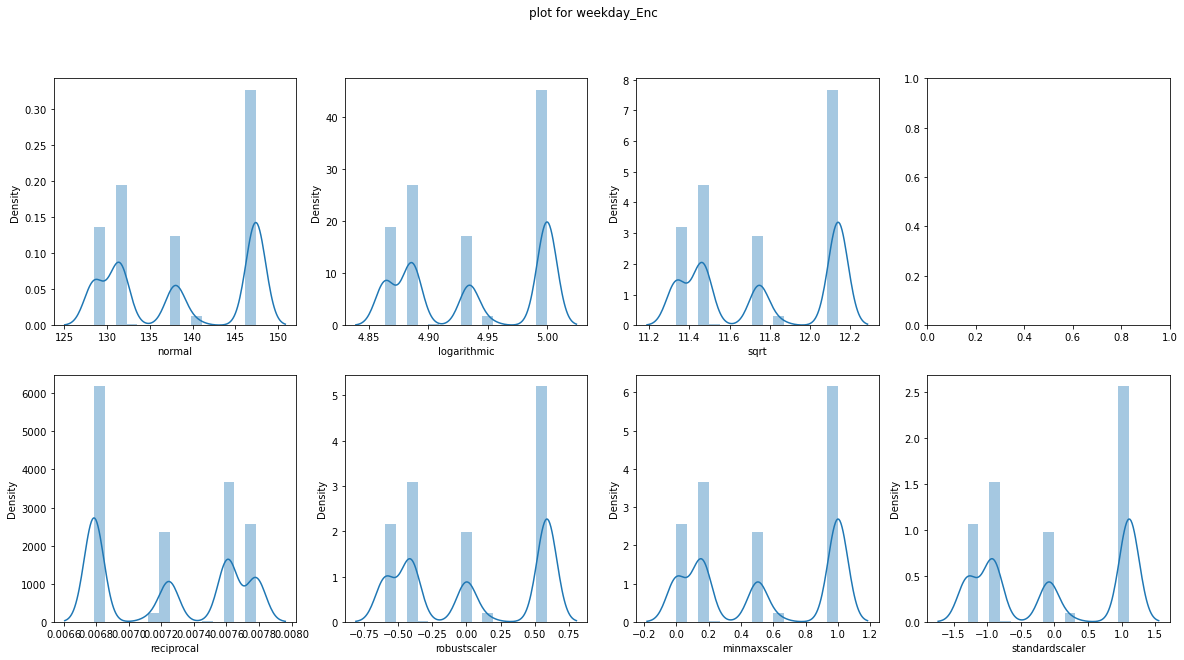

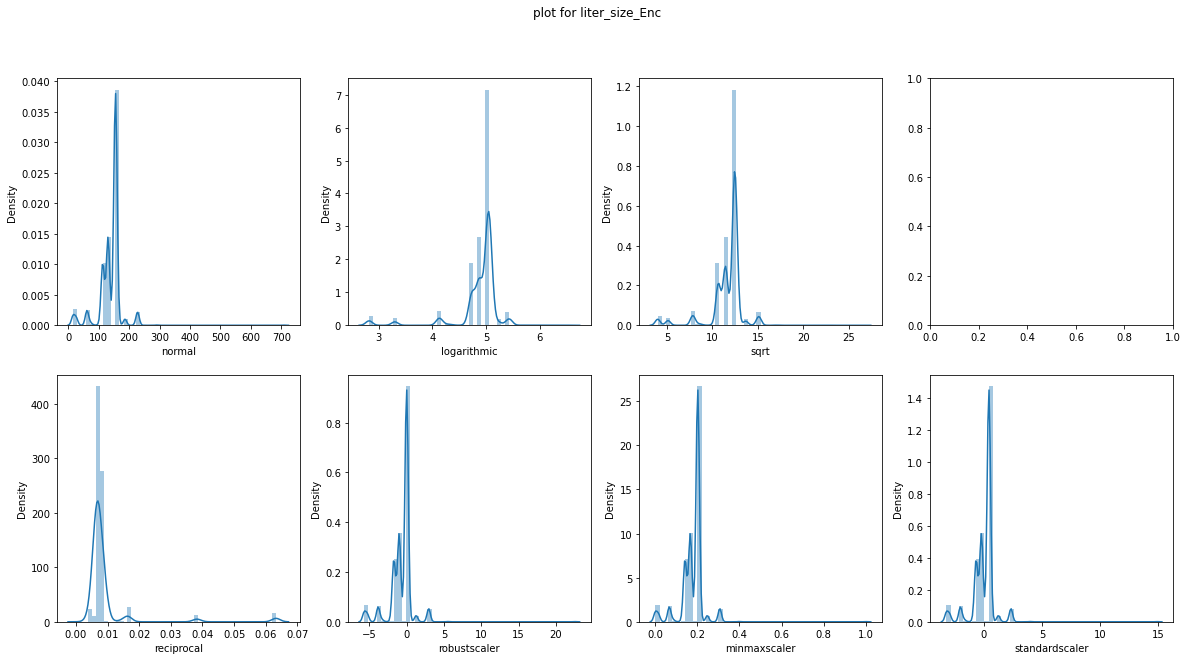

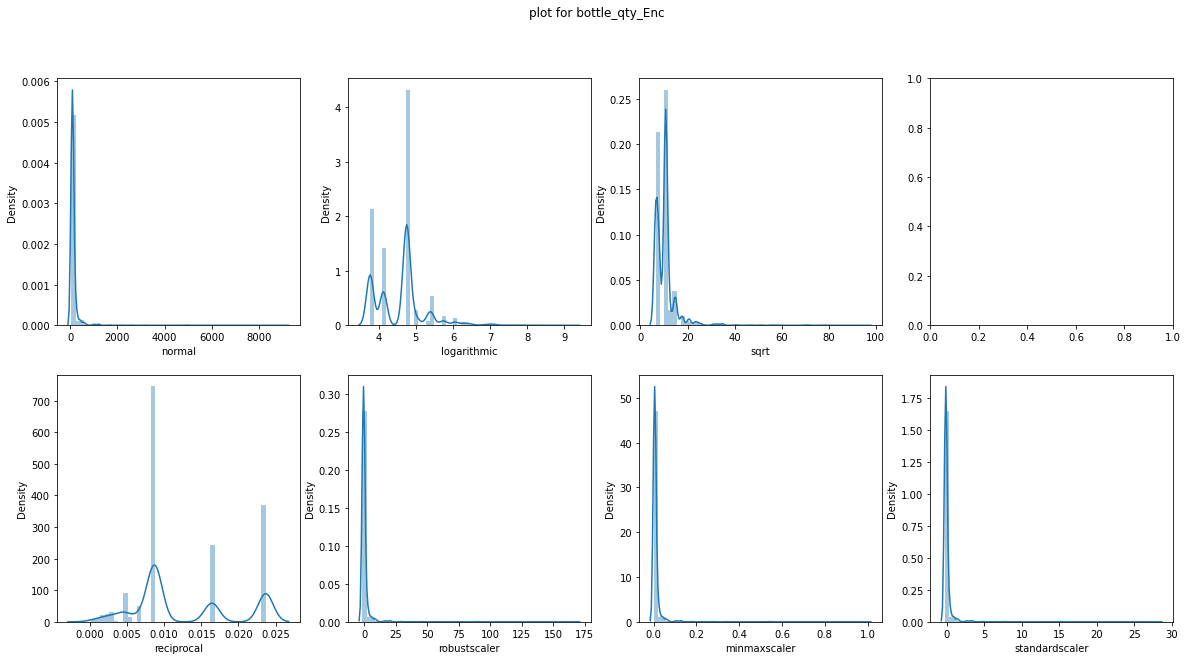

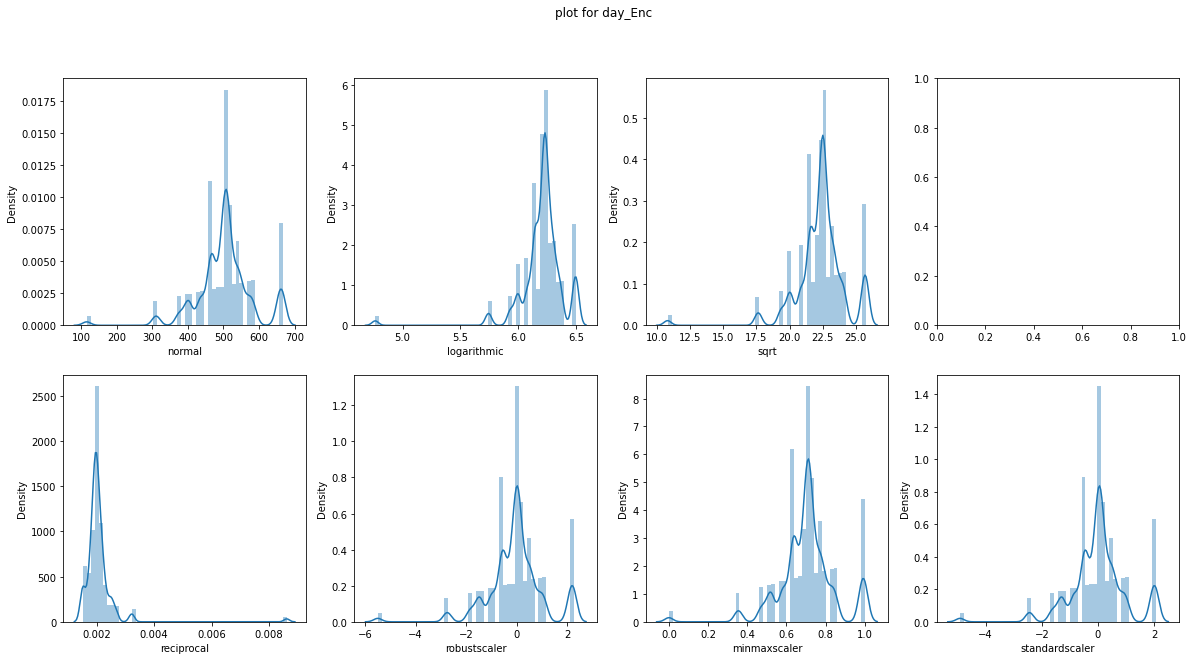

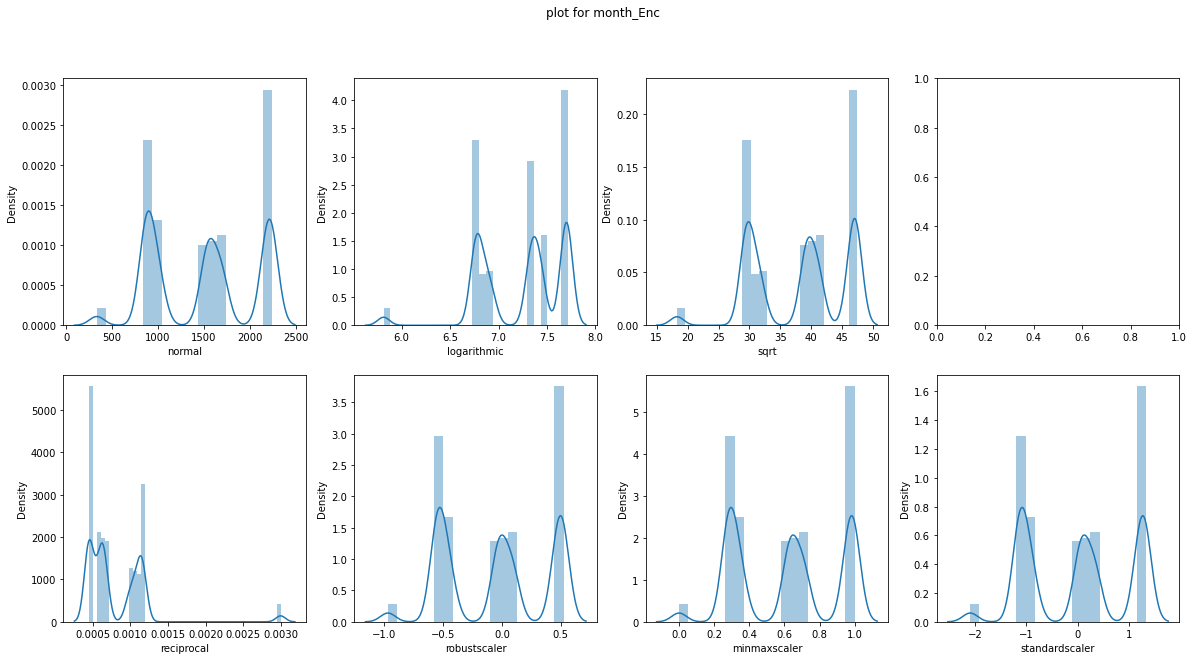

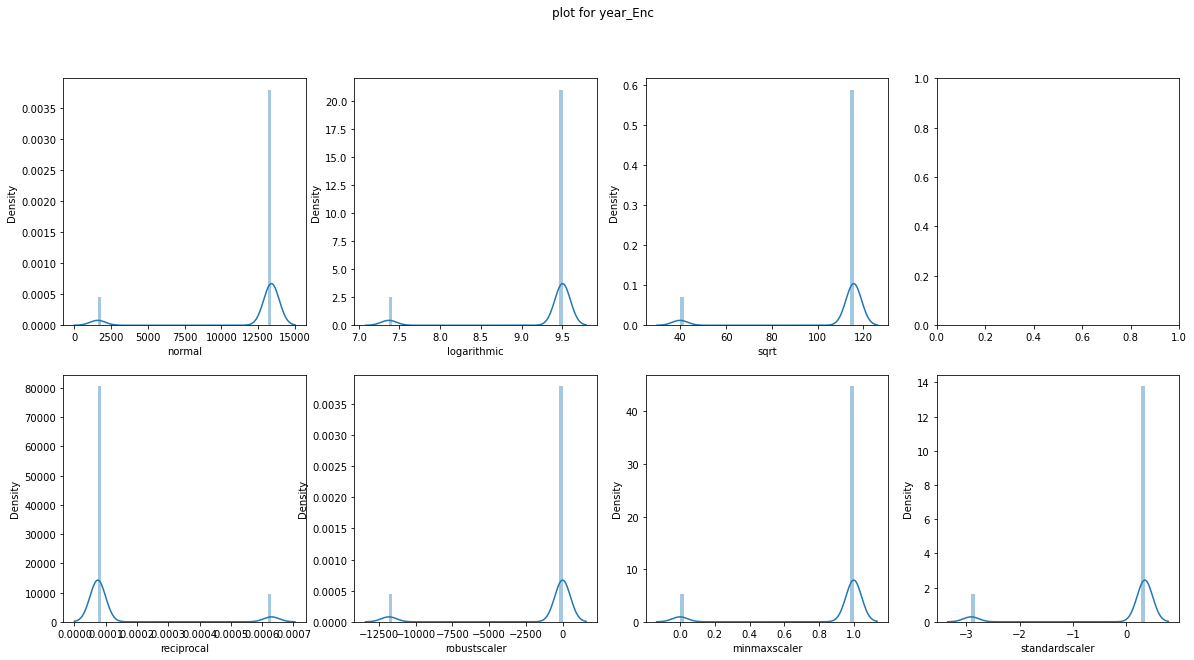

In [80]:
for column in X.columns:
    plot_curve(X,column)

In [ ]:
# for column in X.columns:
#     X[column]=robust.fit_transform(X[[column]])

In [81]:
X

weekday_Enc  liter_size_Enc  bottle_qty_Enc  day_Enc  month_Enc  \
0       137.978841      113.245144      114.342023      657       2175   
1       131.437210      113.245144      193.638489      529       2175   
2       137.978841      113.245144      114.342023      464       1018   
3       137.978841      113.245144       42.235454      512       2175   
4       128.507675      113.245144       42.235454      403       2175   
...            ...             ...             ...      ...        ...   
14995   147.368698      155.102652      311.783058      568       2175   
14996   128.507675      155.102652      114.342023      529        871   
14997   147.368698      155.102652      220.325296      568       2175   
14998   147.368698      155.102652      114.342023      516       2243   
14999   147.368698      155.102652      220.325296      568       1574   

       year_Enc  
0          1588  
1          1588  
2         13407  
3         13407  
4         13407  
...         ...  
14995     13407  
14996     13407  
14997     13407  
14998     13407  
14999     13407  

[14995 rows x 6 columns]

In [82]:
for column in X.columns:
    X[column]=np.log1p(X[[column]])

In [83]:
X1=pd.DataFrame(X,index=X.index,columns=X.columns)
for column in X1.columns:
    X1[column]=standard.fit_transform(X1[[column]])

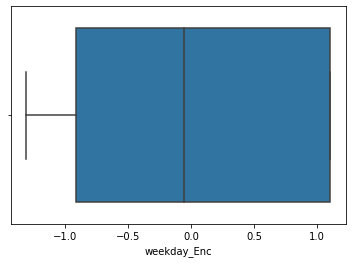

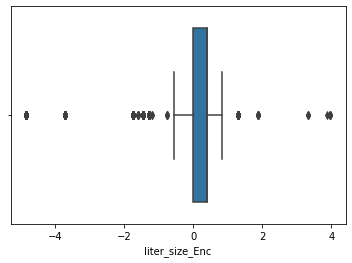

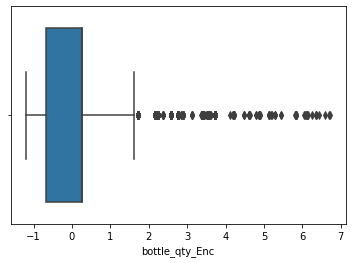

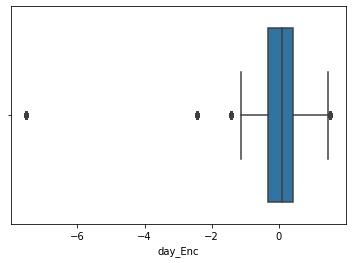

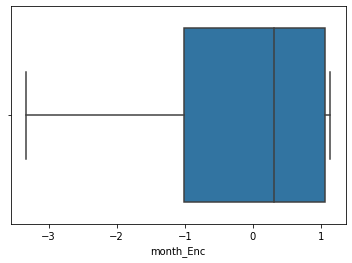

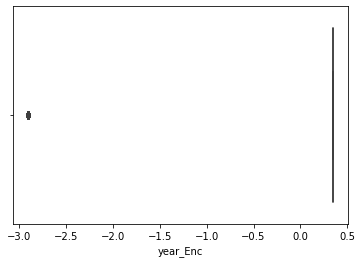

In [84]:
for column in X1.columns:
    sns.boxplot(X1[column])
    plt.show()

### Train test split

In [86]:
X

weekday_Enc  liter_size_Enc  bottle_qty_Enc   day_Enc  month_Enc  \
0         4.934322        4.738347        4.747902  6.489205   7.685244   
1         4.886109        4.738347        5.271144  6.272877   7.685244   
2         4.934322        4.738347        4.747902  6.142037   6.926577   
3         4.934322        4.738347        3.766661  6.240276   7.685244   
4         4.863740        4.738347        3.766661  6.001415   7.685244   
...            ...             ...             ...       ...        ...   
14995     4.999700        5.050514        5.745510  6.343880   7.685244   
14996     4.863740        5.050514        4.747902  6.272877   6.770789   
14997     4.999700        5.050514        5.399634  6.343880   7.685244   
14998     4.999700        5.050514        4.747902  6.248043   7.716015   
14999     4.999700        5.050514        5.399634  6.343880   7.362011   

       year_Enc  
0      7.370860  
1      7.370860  
2      9.503607  
3      9.503607  
4      9.503607  
...         ...  
14995  9.503607  
14996  9.503607  
14997  9.503607  
14998  9.503607  
14999  9.503607  

[14995 rows x 6 columns]

In [117]:
X1

weekday_Enc  liter_size_Enc  bottle_qty_Enc   day_Enc  month_Enc  \
0        -0.056124       -0.327110        0.252730  1.466023   1.061832   
1        -0.912410       -0.327110        1.027899  0.338564   1.061832   
2        -0.056124       -0.327110        0.252730 -0.343347  -0.720211   
3        -0.056124       -0.327110       -1.200953  0.168653   1.061832   
4        -1.309686       -0.327110       -1.200953 -1.076245   1.061832   
...            ...             ...             ...       ...        ...   
14995     1.105033        0.407677        1.730659  0.708620   1.061832   
14996    -1.309686        0.407677        0.252730  0.338564  -1.086143   
14997     1.105033        0.407677        1.218253  0.708620   1.061832   
14998     1.105033        0.407677        0.252730  0.209133   1.134112   
14999     1.105033        0.407677        1.218253  0.708620   0.302585   

       year_Enc  
0     -2.905632  
1     -2.905632  
2      0.344159  
3      0.344159  
4      0.344159  
...         ...  
14995  0.344159  
14996  0.344159  
14997  0.344159  
14998  0.344159  
14999  0.344159  

[14995 rows x 6 columns]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3,random_state=42)
pca.fit(X)
X_pca=pca.transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.3,random_state=42)

### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression,LogisticRegression,QuantileRegressor,HuberRegressor,Lasso,Ridge
from sklearn.metrics import r2_score
linear=LinearRegression()
# logistic=LogisticRegression()
lasso=Lasso()
ridge=Ridge()
quantile_=QuantileRegressor()
Huber=HuberRegressor()
linear.fit(X_train,y_train)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
# logistic.fit(X_train,y_train)
# quantile_.fit(X_train,y_train)
Huber.fit(X_train,y_train)

HuberRegressor()

In [89]:
y_pred_linear=linear.predict(X_test)
y_pred_lasso=lasso.predict(X_test)
y_pred_ridge=ridge.predict(X_test)
# y_pred_logistic=logistic.predict(X_test)
# y_pred_quantile=quantile_.predict(X_test)
y_pred_huber=Huber.predict(X_test)

In [90]:
r2_score(y_test,y_pred_linear)
r2_score(y_test,y_pred_lasso)
r2_score(y_test,y_pred_ridge)
r2_score(y_test,y_pred_huber)

0.1744234465243658

## XGBOOST

In [91]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
import xgboost as xgb
boost=xgb.XGBRegressor()

In [92]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [93]:
boost_reg=RandomizedSearchCV(boost,params,n_iter=10,\
                                 scoring='r2',n_jobs=-1,cv=5,verbose=5,)

In [94]:
boost_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [95]:
boost_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
regressor=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [97]:
score=cross_val_score(regressor,X_train,y_train,scoring='r2',cv=10)
score

array([0.78726881, 0.86049317, 0.89893829, 0.68235466, 0.91713444,
       0.92248756, 0.87455009, 0.87763241, 0.86777697, 0.73868706])

In [98]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [99]:
y_pred=regressor.predict(X_test)

In [100]:
r2_score(y_test,y_pred)

0.9168929978166102

### Ensemble Regressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,\
                             ExtraTreesRegressor,HistGradientBoostingRegressor,RandomForestRegressor
gradient=GradientBoostingRegressor()
adaboost=AdaBoostRegressor()
bagging=BaggingRegressor()
extratree=ExtraTreesRegressor()
Histgradient=HistGradientBoostingRegressor()
random_forest=RandomForestRegressor()

In [102]:
gradient.fit(X_train,y_train)
adaboost.fit(X_train,y_train)
bagging.fit(X_train,y_train)
extratree.fit(X_train,y_train)
Histgradient.fit(X_train,y_train)
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
gradient_pred=gradient.predict(X_test)
adaboost_pred=adaboost.predict(X_test)
bagging_pred=bagging.predict(X_test)
extratree_pred=extratree.predict(X_test)
histgradient_pred=Histgradient.predict(X_test)
randomforest_pred=random_forest.predict(X_test)

In [104]:
print('gradient boosting score',r2_score(y_test,gradient_pred))
print('adaboosting score',r2_score(y_test,adaboost_pred))
print('bagging score',(r2_score(y_test,bagging_pred)))
print('extratree score',r2_score(y_test,extratree_pred))
print('histgradient score',r2_score(y_test,histgradient_pred))
print('randomforest score',r2_score(y_test,randomforest_pred))

gradient boosting score 0.9146868954994628
adaboosting score 0.8717794760471114
bagging score 0.9022041624246625
extratree score 0.9041269608644077
histgradient score 0.8565792150499938
randomforest score 0.9121075747317048


### PCA

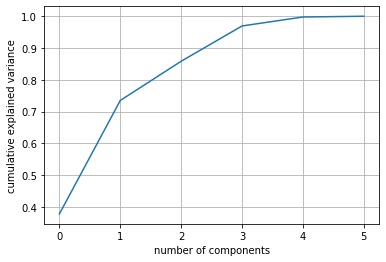

In [105]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [106]:
y_pred=regressor.predict(X_test)

In [108]:
r2_score(y_test,y_pred)

0.9168929978166102

In [108]:
 1 - (1-r2_score(y_test, gradient_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)

0.9055345832043192

In [109]:
from sklearn.metrics import ad

ImportError: cannot import name 'ad' from 'sklearn.metrics' (D:\Softwares\Anacondanew\lib\site-packages\sklearn\metrics\__init__.py)

In [109]:
final_df=y_test.merge(pd.DataFrame(y_pred,index=y_test.index,columns={'total':0}),on=y_test.index)
final_df.set_index('key_0').rename_axis('')

total_x     total_y
                          
13415    70.56   86.315735
6477     64.56   91.918533
9972    189.00  199.027420
862      44.58   50.984100
5972     66.00  115.116394
...        ...         ...
4222     54.00   42.705048
13390   126.06  108.413834
12747    60.24  158.108521
5693    132.72   97.249329
4877     84.24  102.653152

[4499 rows x 2 columns]

In [110]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
rng = np.random.RandomState(0)
# X, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [111]:
huber = HuberRegressor().fit(X_train, y_train)
print(huber.score(X_train, y_train))

y_predict=huber.predict(X_test)
print(r2_score(y_test,y_predict))

linear = LinearRegression().fit(X_train, y_train)
# print("True coefficients:", coef)

print("Huber coefficients:", huber.coef_)

print("Linear Regression coefficients:", linear.coef_)

0.19095627874547805
0.1744234465243658
Huber coefficients: [-2.31293445 -0.4825902  67.64440957 -0.28306725 -1.10829627 -1.40357185]
Linear Regression coefficients: [[ -7.35236863 -19.63535363 195.13474369   0.56161136   1.14494795
    0.95143805]]


In [112]:
linear.score(X_train,y_train)

0.34898338137549223

In [113]:
!pip install Django

In [114]:
import pickle
# # open a file, where you ant to store the data
file = open('XGBoost_regression_model.pkl', 'wb')
# # dump information to that file
pickle.dump(regressor, file)

In [115]:
X_train

weekday_Enc  liter_size_Enc  bottle_qty_Enc   day_Enc  month_Enc  \
12229     1.105033       -4.838253       -1.200953  0.199042   0.212904   
5901      1.105033        0.407677        0.331574  0.127856   1.061832   
13644    -0.912410        0.407677        2.761678  0.844234   0.475060   
1572     -0.912410       -0.327110       -1.200953 -0.643224  -1.019748   
12997     1.105033        0.005589        0.252730 -0.038603  -1.086143   
...            ...             ...             ...       ...        ...   
5196     -0.056124        0.005589        0.331574  0.338564  -0.720211   
13423     1.105033        0.407677        0.252730 -0.343347  -0.872575   
5395     -0.912410        0.005589        0.252730  0.531616  -1.086143   
860      -0.056124       -0.327110       -1.200953 -0.081062  -1.113236   
7275     -0.056124        0.005589        0.331574 -0.354567   0.475060   

       year_Enc  
12229  0.344159  
5901   0.344159  
13644  0.344159  
1572   0.344159  
12997  0.344159  
...         ...  
5196   0.344159  
13423  0.344159  
5395   0.344159  
860    0.344159  
7275   0.344159  

[10496 rows x 6 columns]

In [116]:
y_train

total
12229    7.44
5901    40.50
13644  537.12
1572    44.58
12997   80.04
...       ...
5196    64.35
13423  106.50
5395    99.00
860     44.58
7275   117.00

[10496 rows x 1 columns]